<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Transaction 🛡️
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  This dataset simulates transactional activity from a digital banking platform. It includes detailed information for each transaction such as **amount**, **location**, **transaction type**, **device**, and **channel**, along with **customer demographic** and **behavioral features** like login attempts and transaction duration.

  This dataset can be used to explore behavior-based fraud detection and temporal transaction patterns for financial customers.

* **Goal of the Project** <br>
  Build a machine learning model to **identify fraudulent or suspicious transactions** by analyzing transactional, geographic, temporal, and user-related characteristics.

**Key Features**

| Feature Name              | Description                                            |
| ------------------------- | ------------------------------------------------------ |
| `TransactionID`           | Unique identifier for each transaction                 |
| `AccountID`               | Unique customer account ID                             |
| `TransactionAmount`       | Amount of money involved in the transaction            |
| `TransactionDate`         | Timestamp of the transaction                           |
| `TransactionType`         | Type of transaction (`Credit`, `Debit`, etc.)          |
| `Location`                | City where the transaction occurred                    |
| `DeviceID`                | Unique identifier of the device used                   |
| `IP Address`              | IP address from which the transaction originated       |
| `MerchantID`              | Unique ID for the merchant involved in the transaction |
| `Channel`                 | Channel used (`Online`, `ATM`, etc.)                   |
| `CustomerAge`             | Age of the customer                                    |
| `CustomerOccupation`      | Occupation of the customer (`Doctor`, `Student`, etc.) |
| `TransactionDuration`     | Duration (in seconds) of the transaction session       |
| `LoginAttempts`           | Number of login attempts before the transaction        |
| `AccountBalance`          | Account balance after the transaction                  |
| `PreviousTransactionDate` | Timestamp of the customer's previous transaction       |

**Files Provided**

* `bank_transactions_data_2.csv`: Main dataset containing all transaction-level records and behavioral features. Labels (`isFraud`) are **not** included, implying the project may involve **unsupervised labeling** prior to training supervised models.

**Project Objective**

The primary goal is to **analyze behavioral transaction data** to identify **unusual or potentially fraudulent activity**, and then use this analysis to define a binary label (`isFraud`) to train classification models.

**Key components of the analysis include:**

* **Exploratory Data Analysis (EDA):**

  * Explore transaction patterns by location, channel, and occupation
  * Identify anomalies in login attempts, transaction duration, and timing
  * Time-series analysis of account activity per user

* **Feature Engineering:**

  * Create features such as:

    * Time difference between current and previous transaction
    * Frequency of transactions per day/week
    * Device/IP diversity per account
    * Average transaction amount per occupation

* **Modeling Approaches:**

  1. **Phase 1 – Anomaly Detection to Generate `isFraud`:**

     * Use unsupervised learning methods to assign fraud probability:

       * `Isolation Forest`: isolate outliers using random splits in feature space
     * Transactions with high anomaly scores will be labeled as `isFraud = 1`, others as `0`.

  2. **Phase 2 – Supervised Fraud Classification:**

     * Use the generated `isFraud` labels to train supervised models:

       * **Logistic Regression**
       * **Random Forest**
       * **XGBoost**
       * **LightGBM**
     * Apply class balancing techniques if needed (e.g., SMOTE, class weights).

* **Evaluation Framework:**

  * Evaluate supervised models using:

    * **ROC-AUC**.
    * **Confusion Matrix** focusing on minority class (`isFraud = 1`).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [2]:
# Load the datasets
df_bank_transactions = pd.read_csv("bank_transactions_data_2.csv")
# Verify shapes
print("Data Shape:", df_bank_transactions.shape)

Data Shape: (2512, 16)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [3]:
# Display few rows of each dataset
df_bank_transactions.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
# Display information about the DataFrames
print("Data Info:")
df_bank_transactions.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalanc

## Insights from Initial Data Exploration

**Dataset Size and Structure**

* The dataset contains **2512 samples** with **16 features**.
* Features include a mix of **transactional details**, **customer demographics**, and **behavioral indicators**.

**Feature Overview**

* **Numerical features:**

  * `TransactionAmount`: Transaction amount (float).
  * `CustomerAge`: Customer’s age (int).
  * `TransactionDuration`: Duration of the transaction in seconds (int).
  * `AccountBalance`: Account balance after the transaction (float).

* **Categorical features (object type):**

  * Identifiers: `TransactionID`, `AccountID`, `DeviceID`, `MerchantID`.
  * Temporal: `TransactionDate`, `PreviousTransactionDate`.
  * Transactional attributes: `TransactionType`, `Channel`, `Location`, `IP Address`.
  * Demographic: `CustomerOccupation`.
  * Ordinal: `LoginAttempts`.

* **Time-related variables:**

  * `TransactionDate` and `PreviousTransactionDate` need to be converted into **datetime format** for time-series or sequential analysis.

**Data Consistency and Completeness**

* **No missing values**: All features are fully populated across 2512 samples.
* **Data types** are mostly appropriate:

  * Numerical attributes stored as `int64` or `float64`.
  * Transactional, temporal, and identifier attributes stored as `object`.
* Potential preprocessing required:

  * Convert date fields to datetime.
  * Encode categorical variables for modeling (`TransactionType`, `Channel`, `CustomerOccupation`, etc.).

In [5]:
num_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]
cat_features = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "TransactionDate", "PreviousTransactionDate", 
                "TransactionType", "Channel", "Location", "IP Address", "CustomerOccupation", "LoginAttempts"]

print("Data describe:")
cmap = sns.light_palette("blue", as_cmap=True)
display(df_bank_transactions.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cmap))

Data describe:


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.000000,297.593778,291.946243,0.260000,81.885000,211.140000,414.527500,1919.110000
CustomerAge,2512.000000,44.673965,17.792198,18.000000,27.000000,45.000000,59.000000,80.000000
TransactionDuration,2512.000000,119.643312,69.963757,10.000000,63.000000,112.500000,161.000000,300.000000
AccountBalance,2512.000000,5114.302966,3900.942499,101.250000,1504.370000,4735.510000,7678.820000,14977.990000


## Descriptive Insights from Dataset Statistics

We examined the summary statistics of the **numerical features** across the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

**TransactionAmount**

* Ranges from **0.26** to **1919.11**, with a mean of \~**297.6** and median of **211.1**.
* Distribution is slightly **right-skewed**, since the mean > median, suggesting that while most transactions are relatively small, there are a few very large amounts pulling the average upwards.
* The interquartile range (IQR) lies between **81.9** (Q1) and **414.5** (Q3), meaning half of the transactions fall within this range.

**CustomerAge**

* Age ranges from **18** to **80** years, with a mean of **44.7** and a median of **45**, showing a nearly symmetric distribution.
* Standard deviation is \~**17.8**, reflecting a wide spread of ages.
* The IQR spans from **27** (Q1) to **59** (Q3), which means 50% of customers are between 27 and 59 years old.
* No extreme skewness is present, but younger (18–25) and older (70–80) groups represent smaller portions.

**TransactionDuration**

* Values range from **10** to **300** seconds, with a mean of \~**119.6** and median of **112.5**.
* The IQR spans from **63** (Q1) to **161** (Q3), meaning most transactions last between 1–3 minutes.
* Distribution is roughly symmetric, though a few long-duration outliers exist near the maximum (300 seconds).

**AccountBalance**

* Balances span from **101.25** to nearly **14,978**, with a mean of **5114.3** and a median of **4735.5**.
* The distribution shows **moderate right-skew**, as a small number of customers have very high balances.
* The IQR ranges from **1504.4** (Q1) to **7678.8** (Q3), meaning 50% of customers hold balances within this band.
* High outliers above **10,000** may represent premium or high-net-worth customers.

**Overall Observation**:

* Most features (TransactionAmount, AccountBalance) show a **right-skewed distribution**, consistent with typical financial datasets where small transactions and mid-level balances are more common, but a few high-value cases exist.
* Behavioral features (`LoginAttempts`, `TransactionDuration`) highlight potential for detecting anomalies (e.g., multiple login attempts or unusually long transactions).
* Demographic feature (`CustomerAge`) is well-distributed across adult customers.

In [6]:
def convert_cat(features, df = df_bank_transactions):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(cat_features)

# Display information about the DataFrames
print("Data Info:")
df_bank_transactions.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   TransactionID            2512 non-null   category
 1   AccountID                2512 non-null   category
 2   TransactionAmount        2512 non-null   float64 
 3   TransactionDate          2512 non-null   category
 4   TransactionType          2512 non-null   category
 5   Location                 2512 non-null   category
 6   DeviceID                 2512 non-null   category
 7   IP Address               2512 non-null   category
 8   MerchantID               2512 non-null   category
 9   Channel                  2512 non-null   category
 10  CustomerAge              2512 non-null   int64   
 11  CustomerOccupation       2512 non-null   category
 12  TransactionDuration      2512 non-null   int64   
 13  LoginAttempts            2512 non-null   category
 1

In [7]:
print("Data describe:")
cat_summary = df_bank_transactions.describe(include=["category", "object"]).T
cat_summary.style.background_gradient(cmap="Blues", subset=["unique", "freq"])

Data describe:


,count,unique,top,freq
TransactionID,2512,2512,TX002496,1
AccountID,2512,495,AC00460,12
TransactionDate,2512,2512,2023-12-29 17:37:37,1
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000663,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657


## Categorical Feature Insights

* **TransactionType**: The dataset is highly imbalanced by type — most transactions are **Debit (1944 records)**, while the rest are **Credit (568 records)**. This dominance suggests that debit transactions drive most customer activities.

* **Channel**: Three channels are present, with **Branch (868 transactions)** being the most common. Online and ATM channels also account for a significant share, reflecting diverse transaction methods.

* **CustomerOccupation**: Four categories exist, with **Students (657 customers)** being the largest group. This indicates a large representation of younger or financially active individuals in the dataset.

* **LoginAttempts**: Five logins are present, with **1 (2390 logins)** being the most common.

* **Location**: Spread across **43 unique cities**, with the most frequent location being **Fort Worth (70 records)**. This wide spread suggests geographic diversity, though some cities dominate transaction activity.

* **DeviceID & IP Address**: Both show high cardinality — **681 unique DeviceIDs** and **592 unique IP addresses**. This variability is useful for anomaly detection, as unusual devices or IP addresses may indicate fraudulent behavior.

* **MerchantID**: There are **100 unique merchants**, with the most frequent merchant (**M026**) appearing 45 times. This distribution suggests that some merchants process far more transactions than others.

* **AccountID**: **495 unique accounts** are recorded, with the most active account (**AC00460**) appearing 12 times. This indicates moderate customer-level activity, with some accounts being more transaction-heavy.

* **Temporal features (TransactionDate, PreviousTransactionDate)**: Both are highly unique (`2512` and `360` distinct values, respectively), reflecting that nearly every transaction has its own timestamp. Previous transaction timestamps (with max frequency = 16) could provide strong signals for **time-based behavioral analysis**.

**Overall Observations**:

* Several features (`TransactionType`, `Channel`, `CustomerOccupation`, `LoginAttempts`) show **imbalanced distributions**.
* High-cardinality attributes (`DeviceID`, `IP Address`, `TransactionDate`) are strong candidates for **fraud/anomaly detection** since unusual or rare values could flag suspicious activity.
* Geographic and merchant diversity provides context for customer behavior, and temporal features can support **sequence-based modeling**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [8]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value dataset: ")
displayNULL(df_bank_transactions, dataset_name="Dataset")

Missing value dataset: 
🔎 Missing Value Summary for: Dataset
✅ No missing values detected in 2,512 rows.


## Checking duplicate Value

In [9]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Data": df_bank_transactions
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Data Duplicate Analysis
✅ No duplicates found in 2,512 rows



## Checking Outlier Value

In [10]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_bank_transactions, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,TransactionAmount,113


## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values in the dataset.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

  * **No duplicates** detected in 2512 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

**Conclusion**

* The dataset demonstrates **excellent data quality** with **no missing values** and **no duplicate records**, ensuring reliable inputs for analysis and modeling.
* **Outliers are present** in features such as `TransactionAmount` and `AccountBalance`, but they represent realistic variations in financial transactions and should not be removed outright.
* Overall, the dataset is **well-prepared for modeling**, requiring only standard preprocessing steps (e.g., encoding categorical variables, scaling numerical features, and handling outliers carefully if needed).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


## Numerical Feature Distributions

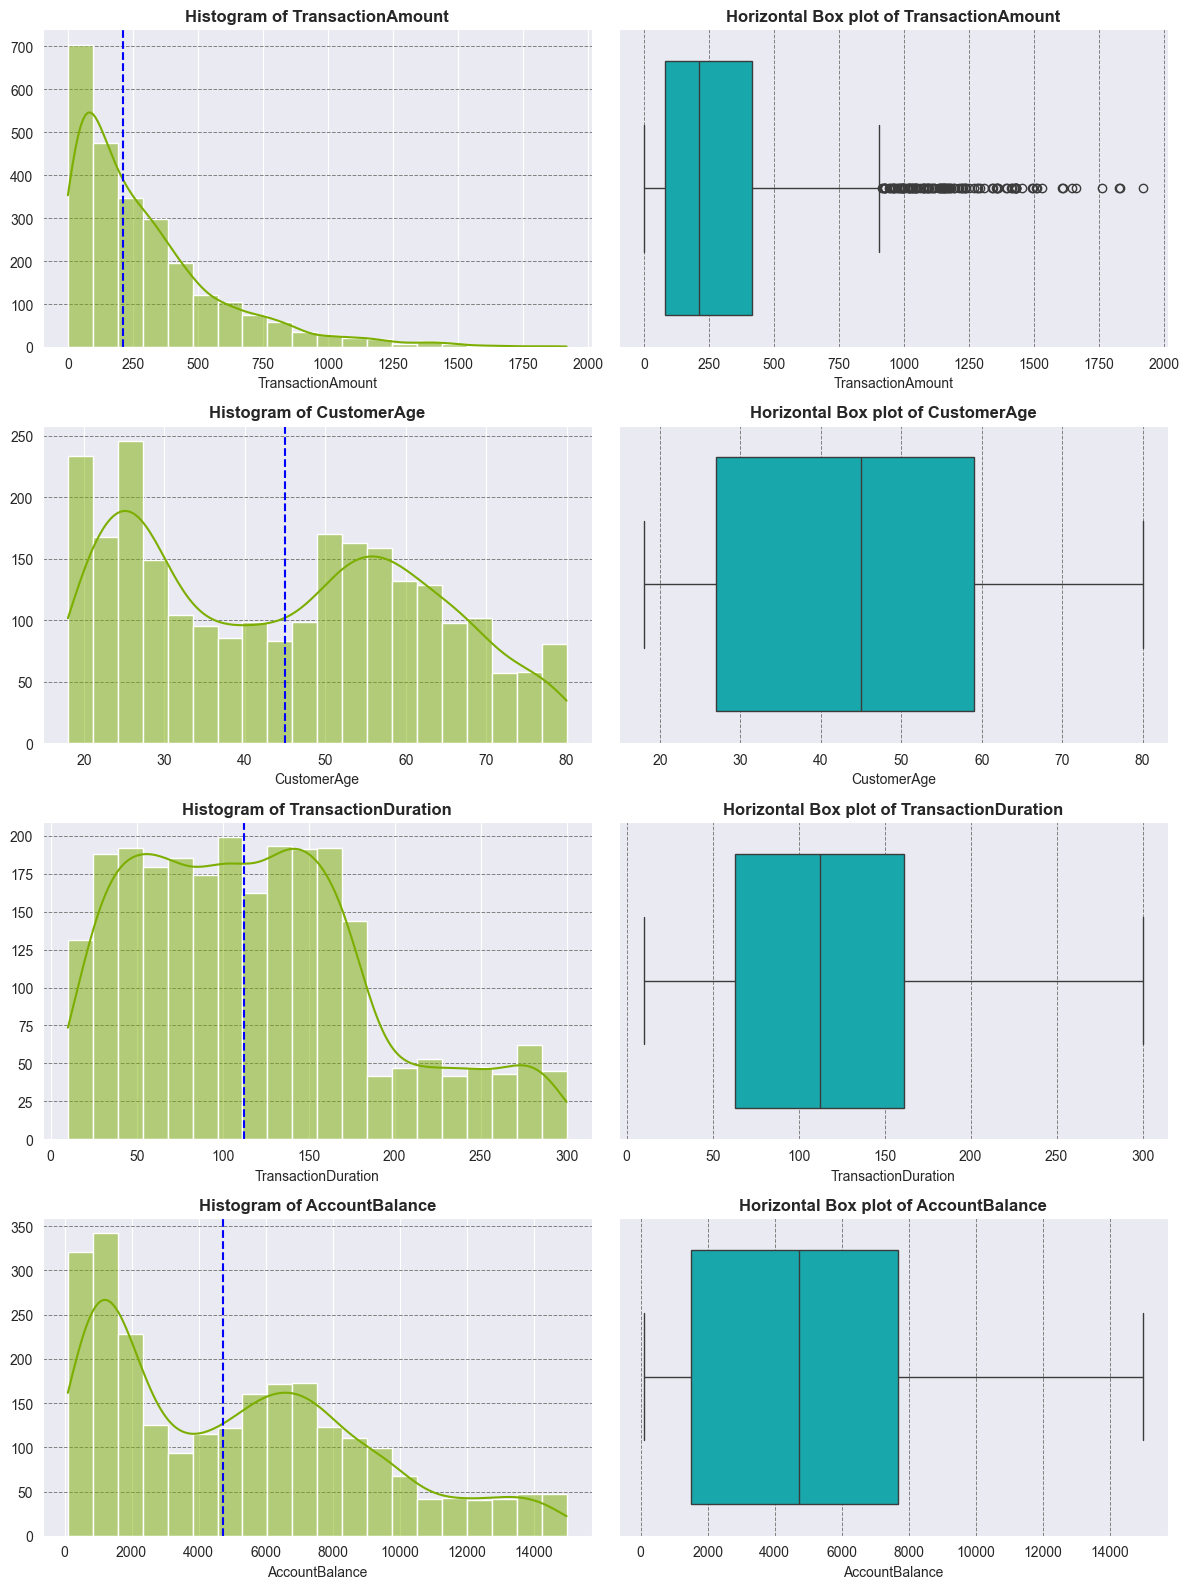

In [11]:
def plot_numerical_features(df=df_bank_transactions, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        if feature == "LoginAttempts":
            bins=5
        else:
            bins=20
        sns.histplot(data=df[feature], color="#7CAE00", bins = bins, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}", weight="bold")
        axes[i, 0].set_ylabel("")
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")
        axes[i, 0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)

        sns.boxplot(data=df[feature], color="#00BFC4", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Box plot of {feature}", weight="bold")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].grid(axis="x", color="gray", linestyle="--", linewidth=0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [12]:
def check_skewness(data = df_bank_transactions, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
TransactionAmount              |  +1.740107 | Highly skewed
AccountBalance                 |  +0.601201 | Moderately skewed
TransactionDuration            |  +0.599432 | Moderately skewed
CustomerAge                    |  +0.147864 | Approximately symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

* **TransactionAmount**: Distribution is **right-skewed**, with most transactions concentrated at smaller amounts (< 500). The boxplot shows several high-value outliers above 1500, representing large but rare transactions.
* **CustomerAge**: Distribution is fairly **symmetric**, spanning from 18 to 80. The central 50% of ages lie between 27 and 59 years. No strong skewness is observed.
* **TransactionDuration**: Values mostly cluster between 50–200 seconds, with a median of 112. The distribution is moderately **right-skewed**, with some unusually long transactions close to 300 seconds.
* **LoginAttempts**: Heavily **right-skewed**. Most customers succeed in the first attempt, but a few records with 3–5 attempts appear as strong outliers. These could indicate suspicious or unusual login behavior.
* **AccountBalance**: Shows **moderate right-skew**. Most balances fall between 1500 and 7500, but some customers hold significantly higher balances (> 10,000), highlighting the presence of high-value accounts.

**Skewness Analysis**

* **Highly Skewed Features**:

  * `LoginAttempts` (+5.17)
  * `TransactionAmount` (+1.74)
    These features are strongly skewed and may benefit from **log transformation** or **robust scaling** to reduce the effect of extreme values during modeling.

* **Moderately Skewed Features**:

  * `AccountBalance` (+0.60)
  * `TransactionDuration` (+0.59)
    These are slightly skewed but still manageable; transformation could improve performance for sensitive models.

* **Approximately Symmetric Feature**:

  * `CustomerAge` (+0.15)
    Age is nearly symmetric, requiring little to no transformation.

**Key Takeaways**

* Outliers are evident in `TransactionAmount`, `LoginAttempts`, and `AccountBalance`. While they reflect real-world variations (e.g., large transactions, repeated login attempts, high balances), they must be carefully handled in fraud detection modeling.
* Features with high skewness may bias models like **Logistic Regression** or **Linear models**, so preprocessing (e.g., log scaling, Box-Cox, or quantile transformation) is recommended.
* Overall, the numerical feature distributions are consistent with realistic banking data, and preprocessing should focus on **skewness reduction** and **outlier management**.

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y

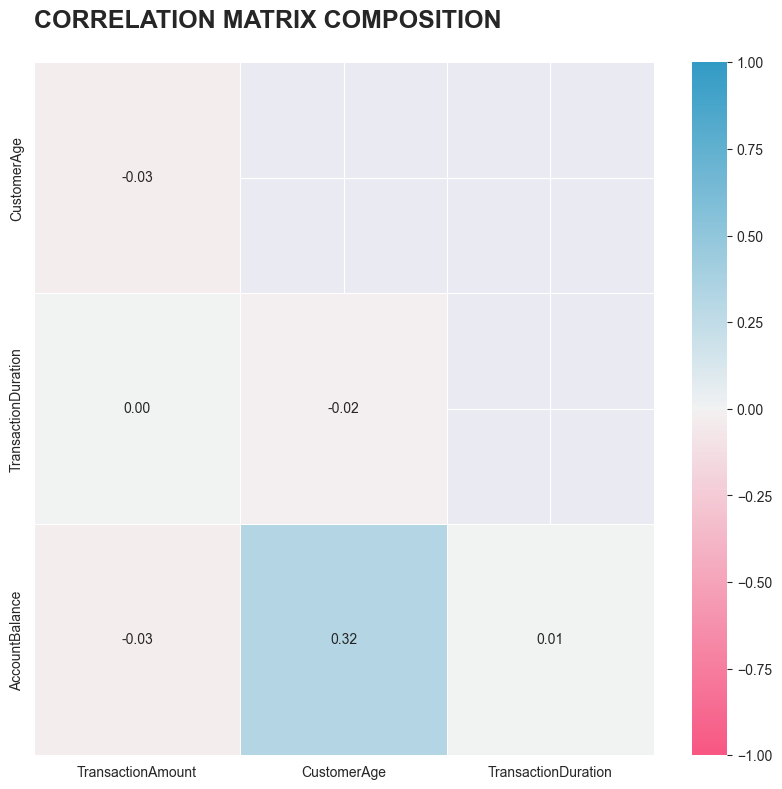

In [13]:
corr_matrix = df_bank_transactions.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = 'CORRELATION MATRIX COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18, weight="bold");

#### Insights from Correlation Analysis of Numerical Features

**Overall Observation**

* The correlation matrix shows that **numerical features are weakly correlated** with each other (all coefficients fall between -0.03 and +0.32).
* This indicates that the dataset does not have strong multicollinearity issues, which is good for most machine learning models.

**Detailed Analysis**

* **CustomerAge & AccountBalance (0.32)**:

  * This is the only notable positive correlation. Older customers tend to have higher account balances, which aligns with realistic banking behavior (longer financial history → more savings).

* **TransactionAmount with other features (-0.03 to 0.00)**:

  * Practically no correlation with `CustomerAge`, `TransactionDuration`, or `LoginAttempts`.
  * Suggests that transaction size is independent of age, duration, or login attempts — consistent with real-world scenarios.

* **TransactionDuration**:

  * Shows negligible correlation with all other features (close to 0).
  * Duration appears to vary independently, likely influenced more by transaction type/channel than by age or balance.

* **LoginAttempts**:

  * Very weak correlations with other features (≤ 0.03).
  * This reinforces that login behavior is mostly independent and could serve as an **anomaly detection signal** rather than a naturally correlated feature.

**Key Takeaways**

* No strong correlations exist, meaning **each numerical feature provides distinct information** for modeling.
* `CustomerAge` and `AccountBalance` show the most meaningful relationship (0.32), potentially useful for segmentation or risk profiling.
* Features like `LoginAttempts` and `TransactionDuration`, though weakly correlated with others, remain important for fraud detection as they capture **behavioral anomalies** rather than demographic/financial patterns.

## Categorical Feature Distributions

**Categorical Features – Visualization Feasibility**

Although all of the following are **categorical columns**, not all are meaningful for **distribution visualization**:

* **Recommended for Visualization**

  * **`TransactionType`** → Distribution of **Credit vs. Debit** transactions (key insight).
  * **`Channel`** → Distribution across **ATM, Online, Branch**, etc.
  * **`Region`** (derived from `Location`) → Regional transaction distribution.
  * **`CustomerOccupation`** → Distribution of customer occupations, highlighting dominant groups.

* **Not Suitable for Distribution Plots**

  * **Identifiers**: `TransactionID`, `AccountID`, `DeviceID`, `MerchantID` → Mostly unique values, not insightful for frequency distribution.
  * **Time-based Variables**: `TransactionDate`, `PreviousTransactionDate` → Better analyzed via **time-series trends** (seasonality, patterns) rather than simple distributions.
  * **High Cardinality**: `IP Address` → Too many unique values, minimal insight for categorical distribution.
  * **`Location`** → More interpretable when grouped into `Region`.

**Conclusion**:
For categorical EDA, focus on **TransactionType, Channel, Region, and CustomerOccupation**.
Other categorical features will be addressed through **ID uniqueness checks, time-series analysis, or feature engineering**, rather than direct distribution plots.

In [14]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [15]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(feature, df = df_bank_transactions, order = None):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))

    sns.countplot(data=df, x = feature, ax=ax[0],
                  palette=color(n_colors=len(df[feature].unique())), order=order)
    ax[0].set_title(f"Count plot of {feature}", fontsize=14, pad=20, weight="bold")
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel("")
    # ax[0].grid(axis="y", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

    for p in ax[0].patches:
        height = p.get_height()
        ax[0].text(
            p.get_x() + p.get_width() / 2.,
            height + max(df[feature].value_counts()) * 0.01,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
            # fontweight="bold",
            color="black"
        )

    feature_counts = df[feature].value_counts().sort_index()
    wedges, texts, autotexts = ax[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=len(df[feature].unique())),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        # text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax[1].add_artist(centre_circle)
    ax[1].set_title(f"Percentage Distribution of {feature}", fontsize=14, pad=20, weight="bold")
    ax[1].axis("equal")

    plt.tight_layout()
    plt.show()

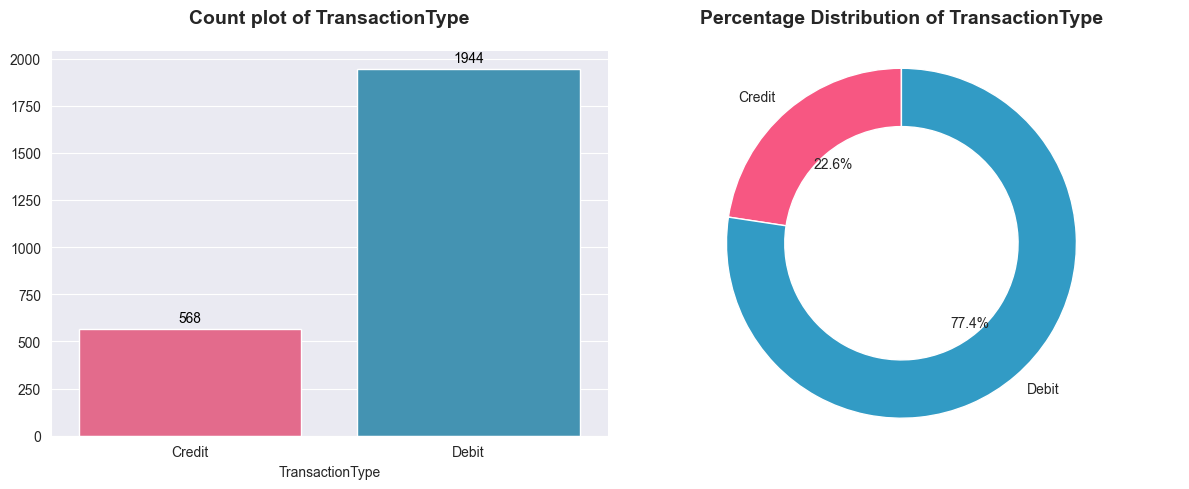

In [16]:
plot_categorical_distribution(feature="TransactionType")

- The bar chart clearly shows that "Debit" transactions are significantly more frequent than "Credit" transactions. The count of "Debit" transactions is around 1944, while "Credit" transactions number approximately 568.
- It shows that "Debit" transactions account for approximately 77.4% of the total transactions, while "Credit" transactions constitute around 22.6%.

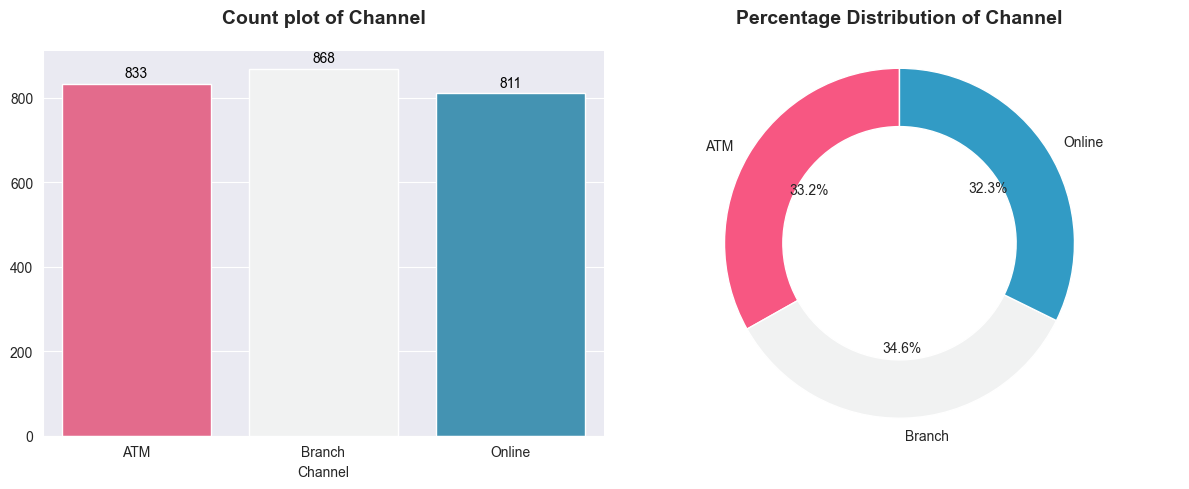

In [17]:
plot_categorical_distribution(feature="Channel")

* The bar chart shows that transactions conducted through **Branch** are the most frequent, with a count of **868**. **ATM** follows closely with **833**, while **Online** transactions are slightly lower at **811**.
* In terms of proportion, **Branch transactions** account for approximately **34.6%** of the total, **ATM transactions** for **33.2%**, and **Online transactions** for **32.3%**.
* The distribution is relatively balanced across the three channels, with only a slight dominance of branch-based transactions. This indicates that customers make use of all three channels fairly evenly, reflecting diverse banking behaviors.

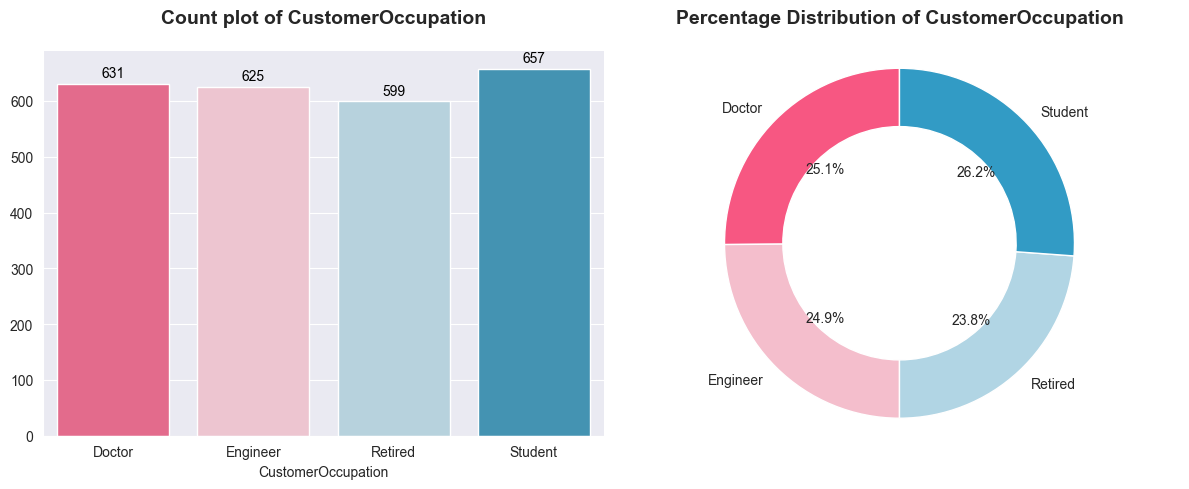

In [18]:
plot_categorical_distribution(feature="CustomerOccupation")

* The bar chart shows that the number of **Students** is the highest at **657**, followed by **Doctors (631)**, **Engineers (625)**, and **Retired individuals (599)**. The distribution across occupations is relatively balanced, with no category overwhelmingly dominating.
* In terms of proportion, **Students** account for around **26.2%** of customers, **Doctors** for **25.1%**, **Engineers** for **24.9%**, and **Retired individuals** for **23.8%**.
* This balanced distribution across the four occupations suggests that the dataset includes a diverse set of customer profiles, which is useful for building generalized fraud detection models without heavy occupation bias.

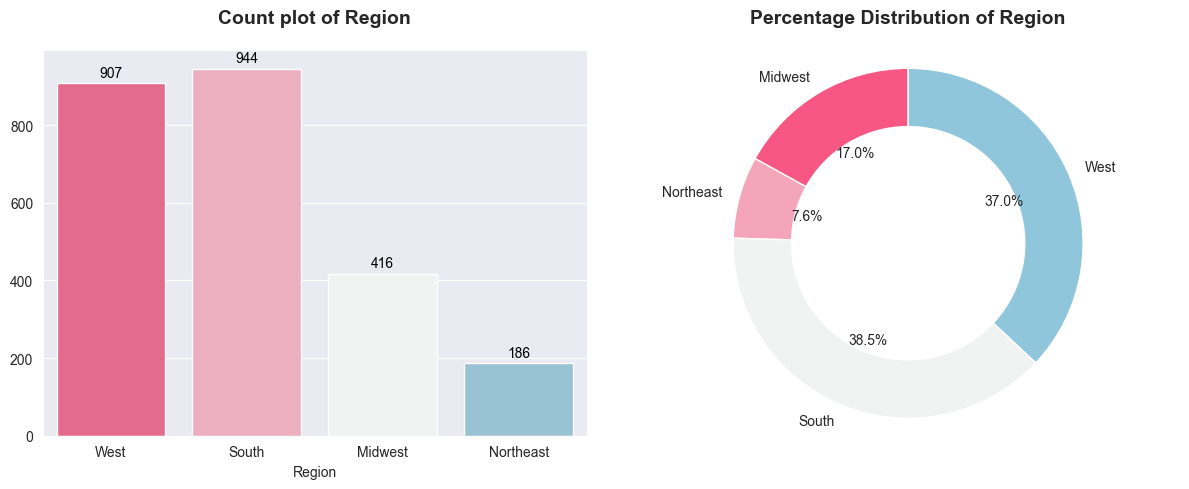

In [19]:
# Mapping city -> region
region_map = {
    # Northeast
    "New York": "Northeast",
    "Philadelphia": "Northeast",
    "Boston": "Northeast",
    
    # Midwest
    "Chicago": "Midwest",
    "Detroit": "Midwest",
    "Columbus": "Midwest",
    "Indianapolis": "Midwest",
    "Milwaukee": "Midwest",
    "Omaha": "Midwest",
    "Kansas City": "Midwest",
    
    # South
    "Dallas": "South",
    "Houston": "South",
    "San Antonio": "South",
    "Austin": "South",
    "Fort Worth": "South",
    "Charlotte": "South",
    "Memphis": "South",
    "Atlanta": "South",
    "Miami": "South",
    "Virginia Beach": "South",
    "Nashville": "South",
    "Louisville": "South",
    "Oklahoma City": "South",
    "Baltimore": "South",
    "Washington": "South",
    "Jacksonville": "South",
    
    # West
    "Los Angeles": "West",
    "San Diego": "West",
    "San Jose": "West",
    "San Francisco": "West",
    "Seattle": "West",
    "Portland": "West",
    "Phoenix": "West",
    "Las Vegas": "West",
    "Denver": "West",
    "Albuquerque": "West",
    "Fresno": "West",
    "Sacramento": "West",
    "Mesa": "West",
    "Colorado Springs": "West",
    "Tucson": "West",
    "El Paso": "West",
}

# Apply mapping
df_bank_transactions["Region"] = df_bank_transactions["Location"].map(region_map)
df_bank_transactions = df_bank_transactions.drop(columns=["Location"])
plot_categorical_distribution(feature="Region")

* The bar chart shows that **South (944)** and **West (907)** account for the largest share of transactions, far surpassing **Midwest (416)** and **Northeast (186)**.
* The percentage distribution reflects this as well:

  * **South**: \~38.5%
  * **West**: \~37.0%
  * **Midwest**: \~17.0%
  * **Northeast**: \~7.6%
* This indicates that most transactions are concentrated in the **South and West regions**, while the **Northeast** records the lowest transaction activity.

## RFM Analysis

**Customer segmentation based on RFM Score**

| Segment                        | Description                                                                  | RFM Condition    |
| ------------------------------ | ---------------------------------------------------------------------------- | -------------------------- |
| **Champions / Best Customers** | Most valuable customers: recent activity, frequent transactions, high spend. | `R ≥ 4, F ≥ 4, M ≥ 4`      |
| **Loyal Customers**            | Loyal customers: purchase frequently and spend consistently well.            | `F ≥ 4, M ≥ 3`             |
| **Potential Loyalists**        | New customers with decent frequency/spending, potential to become loyal.     | `R ≥ 4, F ≥ 2`             |
| **At Risk**                    | Previously frequent/high spenders but inactive for a long time.              | `R ≤ 2, F ≥ 3`             |
| **New Customers**              | Recently joined, made transactions recently but with low frequency.          | `R ≥ 4, F = 1`             |
| **Hibernating / Churn**        | Customers inactive for a long time with low spending.                        | `R = 1, F = 1, M = 1`      |
| **Others**                     | Customers not falling into the above categories.                             | Different from above rules |


In [20]:
df_bank_transactions["TransactionDate"] = pd.to_datetime(df_bank_transactions["TransactionDate"], format="mixed")
df_bank_transactions["PreviousTransactionDate"] = pd.to_datetime(df_bank_transactions["PreviousTransactionDate"], format="mixed")

In [21]:
recency_date = df_bank_transactions["TransactionDate"].max() + pd.Timedelta(days=1)

rfm_df = df_bank_transactions.groupby("AccountID").agg({
    "TransactionDate": lambda x: (recency_date - x.max()).days,   # Recency
    "TransactionID": "nunique",                                   # Frequency
    "TransactionAmount": "sum"                                    # Monetary
}).reset_index()

rfm_df.columns = ["AccountID", "Recency", "Frequency", "Monetary"]
print(rfm_df.head())

  AccountID  Recency  Frequency  Monetary
0   AC00001       49          2    260.76
1   AC00002       12          7   2056.21
2   AC00003       91          5   1266.34
3   AC00004        1          9   2180.08
4   AC00005       29          9   3131.77


In [22]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"], 5, labels=[5,4,3,2,1])
rfm_df["F"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm_df["M"] = pd.qcut(rfm_df["Monetary"], 5, labels=[1,2,3,4,5])

rfm_df["RFM_Score"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

In [23]:
rfm_df.head()

,AccountID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,AC00001,49,2,260.76,3,1,1,311
1,AC00002,12,7,2056.21,5,4,4,544
2,AC00003,91,5,1266.34,2,3,3,233
3,AC00004,1,9,2180.08,5,5,4,554
4,AC00005,29,9,3131.77,4,5,5,455


In [24]:
def classify_rfm(row):
    r, f, m = row["R"], row["F"], row["M"]

    if r >= 4 and f >= 4 and m >= 4:
        return "Best Customers"
    elif f >= 4 and m >= 3:
        return "Loyal Customers"
    elif r >= 4 and f >= 2:
        return "Potential Loyalists"
    elif r <= 2 and f >= 3:
        return "At Risk"
    elif r >= 4  and f == 1:
        return "New Customers"
    elif r == 1  and f == 1 and m == 1:
        return "Churn Customers"
    else:
        return "Other"

rfm_df["RFM_Segment"] = rfm_df.apply(classify_rfm, axis=1)
print(rfm_df.head())

  AccountID  Recency  Frequency  Monetary  R  F  M RFM_Score     RFM_Segment
0   AC00001       49          2    260.76  3  1  1       311           Other
1   AC00002       12          7   2056.21  5  4  4       544  Best Customers
2   AC00003       91          5   1266.34  2  3  3       233         At Risk
3   AC00004        1          9   2180.08  5  5  4       554  Best Customers
4   AC00005       29          9   3131.77  4  5  5       455  Best Customers


In [25]:
# Reference from Google
# Create a layout with clear headers, centered text, and nicely formatted numbers
summary_rfm = (
    rfm_df.groupby("RFM_Segment").agg({
        "Recency": ["mean", "min", "max"],
        "Frequency": ["mean", "min", "max"],
        "Monetary": ["mean", "min", "max"],
        "AccountID": "count"
    })
    .sort_values(("Monetary", "mean"), ascending=False)
    .style
    .set_caption("RFM Summary by Segment")
    .format(precision=0)  # Round numbers
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ])
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    .background_gradient(subset=[("Recency", "mean"), ("Frequency", "mean"), ("Monetary", "mean"), ("AccountID", "count")], cmap="Blues")
)
summary_rfm


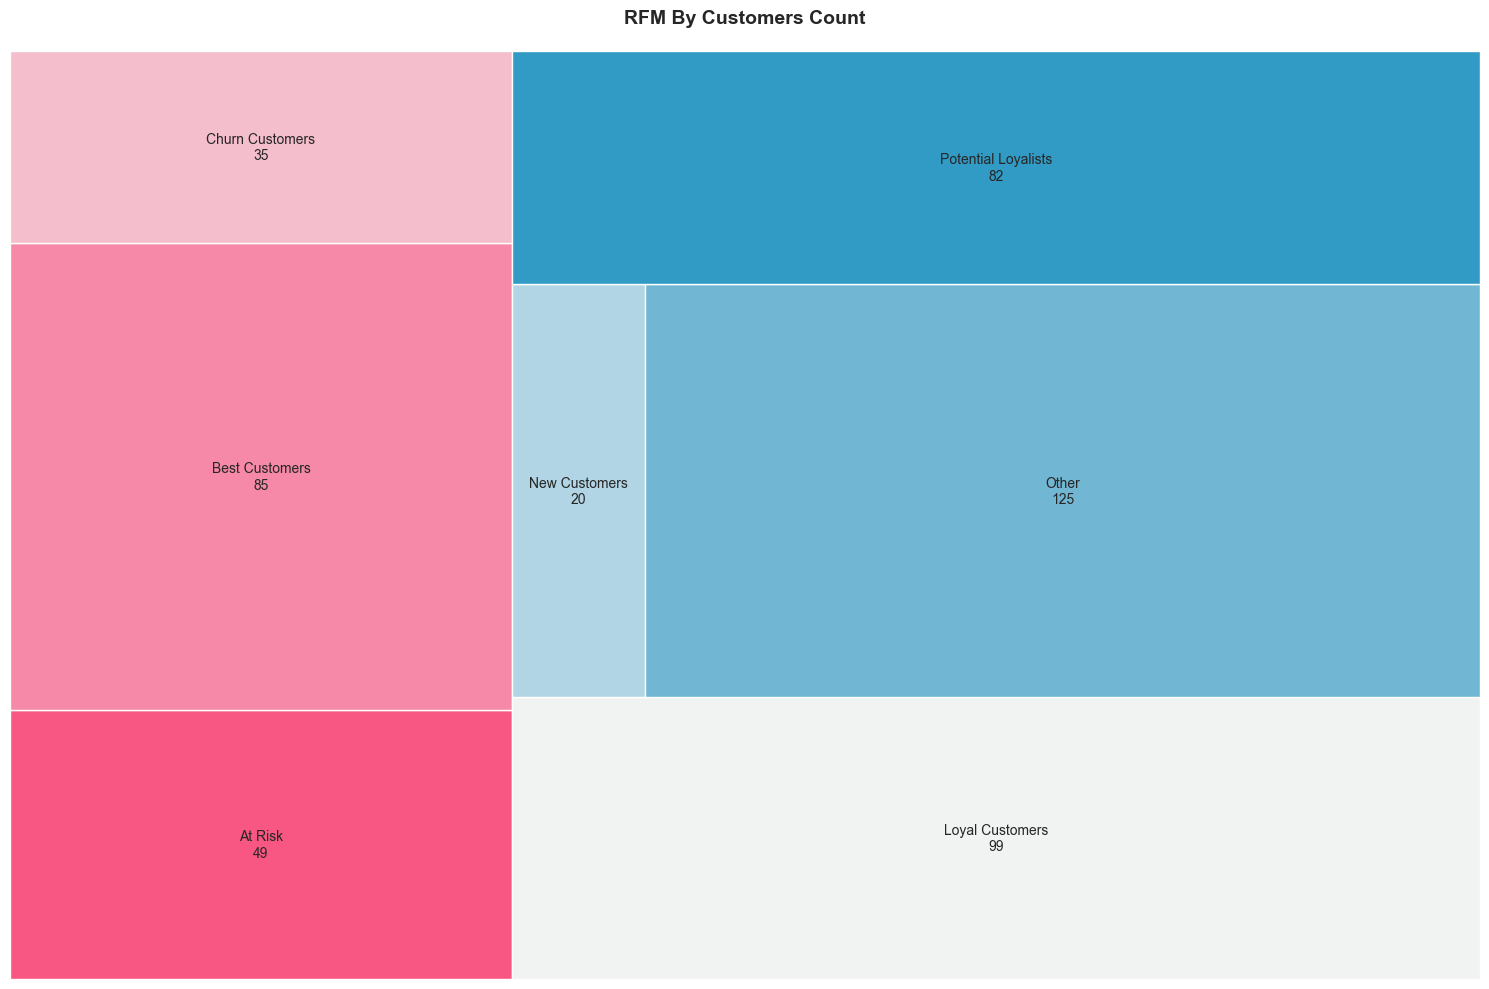

In [26]:
import squarify

rfm_df = rfm_df.astype({
    "R": "int8",
    "F": "int8",
    "M": "int8"
})

rfm_summarised = rfm_df.groupby (by = "RFM_Segment", as_index = False)\
                        .agg (
                            customersCount = ("AccountID", "nunique"),
                            total_R = ("R", "sum"),
                            total_F = ("F", "sum"),
                            total_M = ("M", "sum")
                        )

plt.figure(figsize=(15, 10))
squarify.plot(
    rfm_summarised["customersCount"].to_list(),
    label = rfm_summarised["RFM_Segment"] + "\n" + rfm_summarised["customersCount"].astype(str),
    color = color(n_colors=rfm_df["RFM_Segment"].nunique())
)
plt.title ("RFM By Customers Count", fontsize=14, pad=20, weight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

### **Segment Analysis**

**Best Customers**

* Average Recency = **19 days** → these customers have transacted **very recently**.
* Frequency = **8** → the most frequent group.
* Monetary = **2,558** → highest spending level.
* Count = **85 customers** → small group but **VIP & highly loyal**, should be retained and targeted for upsell.

**Loyal Customers**

* Average Recency = **62 days** → transactions are relatively recent.
* Frequency = **7**, quite frequent.
* Monetary = **2,144**, strong spending.
* Count = **99 customers** → loyal group, providing stable long-term value.

**At Risk**

* Average Recency = **106 days** → quite a long time since last activity.
* Frequency = **5**, used to transact often.
* Monetary = **1,291**, fairly high spending.
* Count = **49 customers** → previously valuable customers, require re-engagement strategies.

**Potential Loyalists**

* Average Recency = **19 days** → recently active.
* Frequency = **5**.
* Monetary = **1,283**.
* Count = **82 customers** → high potential to become loyal if nurtured.

**Other**

* Average Recency = **94 days**.
* Frequency = **3**.
* Monetary = **1,008**.
* Count = **125 customers** → neutral group with moderate activity.

**New Customers**

* Average Recency = **14 days** → very recent transactions.
* Frequency = **2**.
* Monetary = **645**, low spending.
* Count = **20 customers** → new group, should be encouraged to return.

**Churn Customers**

* Average Recency = **227 days** → inactive for a very long time.
* Frequency = **2**, very low.
* Monetary = **301**, the lowest spending.
* Count = **35 customers** → likely churned, difficult to reactivate.

**Overall Insight**:

* **Best & Loyal Customers**: though fewer in number, they generate the highest value → priority for retention and upselling.
* **At Risk & Churn Customers**: warning signs of attrition → need targeted win-back campaigns.
* **Potential Loyalists & New Customers**: represent **growth opportunities** → with the right nurturing, they can transition into Loyal or Best Customers.

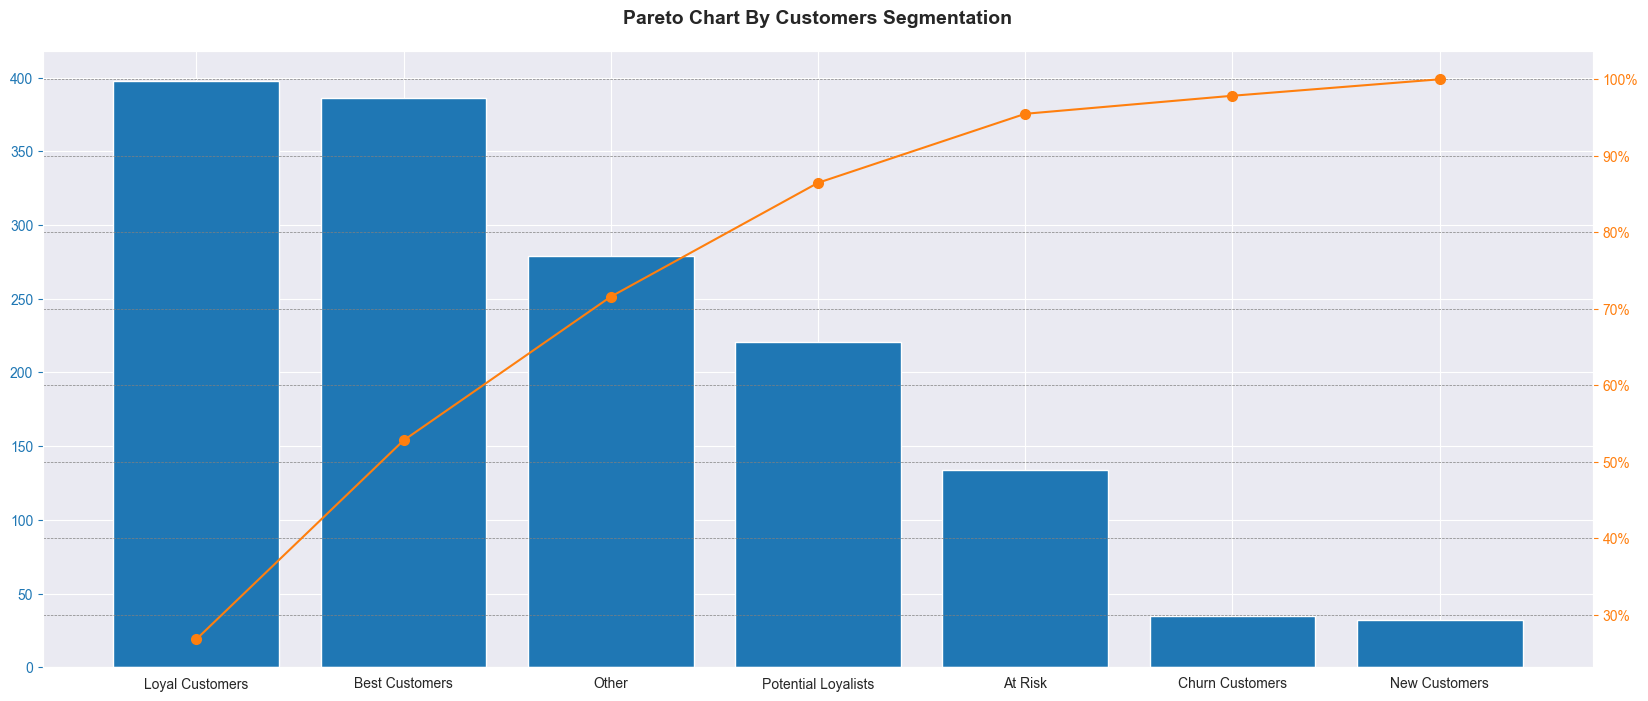

In [27]:
from matplotlib.ticker import PercentFormatter
rfm_summarised = rfm_summarised.sort_values(by="total_M",ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["total_M"].cumsum()/rfm_summarised["total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised["RFM_Segment"], rfm_summarised["total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised["RFM_Segment"], rfm_summarised["cumpercentage"], color="C1", marker="o", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.grid(color = "gray", linestyle = "--", linewidth = 0.5)
plt.title ("Pareto Chart By Customers Segmentation", fontsize=14, pad=20, weight="bold")
plt.show()

### **Meaning of the Pareto chart components**

1. **Loyal Customers & Best Customers**

   * These two segments contribute the **largest share of customers** overall.
   * Together, they represent the **core base** of the business, consistently active and generating high value.

2. **Other & Potential Loyalists**

   * The **Other** group, though neutral, still accounts for a **significant portion** of the customer base.
   * **Potential Loyalists** contribute meaningfully and have the potential to **move up to Loyal/Best Customers** if nurtured properly.

3. **At Risk, Churn Customers, and New Customers**

   * These groups contribute less to the total count compared to the top segments.
   * **At Risk** still shows noticeable weight and signals customers that should be targeted for win-back strategies.
   * **Churn** and **New Customers** are the smallest groups, but strategically important:

     * Churn → may require reactivation campaigns.
     * New Customers → need onboarding and engagement to retain them.

4. **Cumulative percentage line (orange line)**

   * Shows that the combination of **Loyal Customers, Best Customers, and Other** already covers the majority of the customer base (over 70%).
   * Adding Potential Loyalists pushes this share close to **90–95%** of the total.

**Summary**

The chart demonstrates that while the **bulk of customers are concentrated in Loyal, Best, and Other groups**, smaller segments like **Potential Loyalists, At Risk, and New Customers** hold **strategic value**. They can either be converted into high-value customers or reactivated to reduce churn risk.

## Cohort Analysis

* **100% of records have `PreviousTransactionDate` greater than `TransactionDate`.**
* The day difference (`delta_days = TransactionDate − PreviousTransactionDate`) is entirely negative: min = −672 days, max = −308 days.
  → This means the so-called “previous” date actually falls in the **future (year 2024)** compared to the current transaction (year 2023). This is a **data entry error**, not the true “next transaction.”

### Customer Retention

In [28]:
df_bank_transactions_cohort = df_bank_transactions.copy()

In [29]:
# TransactionDate
df_bank_transactions_cohort["cohort"] = df_bank_transactions_cohort.groupby("AccountID")["TransactionDate"].transform("min").dt.to_period("M")
df_bank_transactions_cohort["order_month"] = df_bank_transactions_cohort["TransactionDate"].dt.to_period("M")
# Create cohort dataframe
df_cohort = df_bank_transactions_cohort.groupby(["cohort", "order_month"]).agg(n_customers=("AccountID", "count")).reset_index(drop=False)

In [30]:
from operator import attrgetter

# TransactionDate
df_cohort["period_number"] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter("n"))
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2023-01,2023-01,207,0
1,2023-01,2023-02,73,1
2,2023-01,2023-03,72,2
3,2023-01,2023-04,53,3
4,2023-01,2023-05,75,4


In [31]:
cohort_pivot = df_cohort.pivot_table(index="cohort", columns="period_number", values="n_customers")
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2023-01,207.0,73.0,72.0,53.0,75.0,82.0,74.0,79.0,70.0,68.0,78.0,64.0,5.0
2023-02,145.0,42.0,36.0,57.0,47.0,42.0,40.0,54.0,54.0,50.0,55.0,3.0,NaN
2023-03,83.0,28.0,35.0,21.0,22.0,43.0,25.0,25.0,24.0,30.0,3.0,NaN,NaN
2023-04,44.0,9.0,16.0,16.0,18.0,19.0,20.0,21.0,13.0,NaN,NaN,NaN,NaN
2023-05,44.0,16.0,7.0,19.0,16.0,23.0,12.0,13.0,2.0,NaN,NaN,NaN,NaN
2023-06,30.0,15.0,6.0,7.0,11.0,12.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,19.0,5.0,7.0,6.0,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,14.0,8.0,9.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,8.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


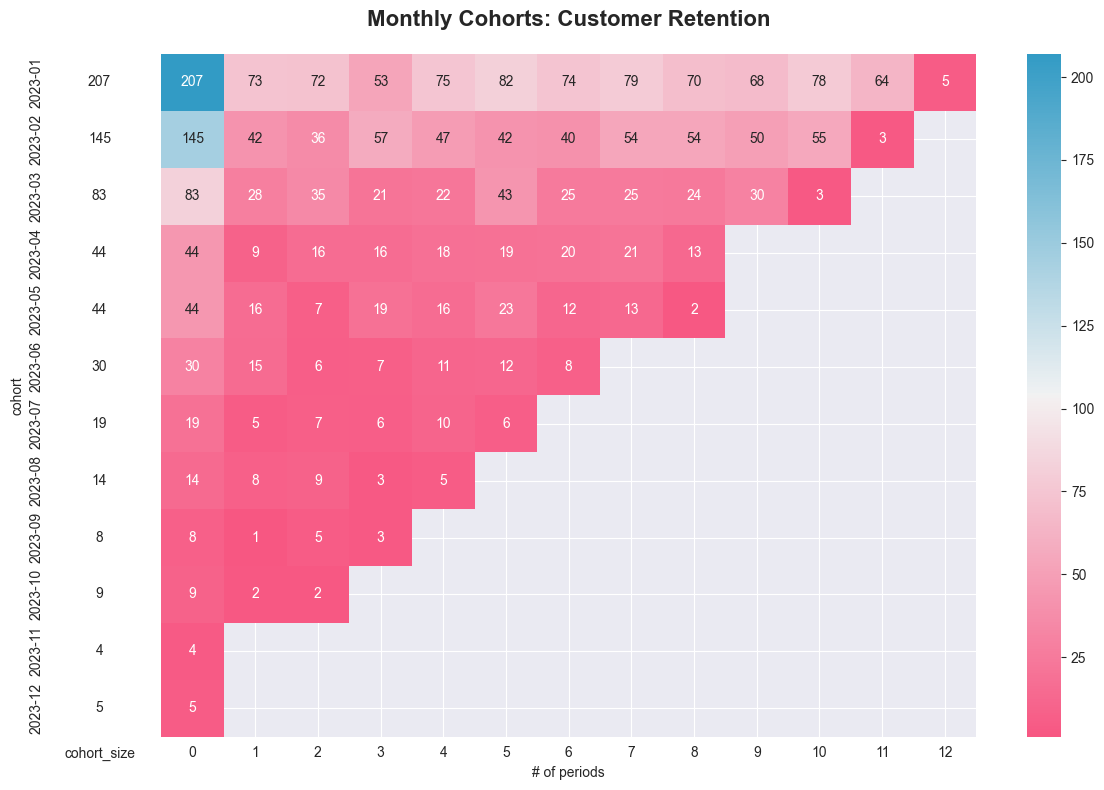

In [32]:
import matplotlib.colors as mcolors

cohort_size = cohort_pivot.iloc[:, 0]
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(cohort_pivot, mask=cohort_pivot.isnull(), annot=True, fmt=".0f", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention", fontsize=16, pad=20, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

In [33]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2023-01,1.0,0.352657,0.347826,0.256039,0.362319,0.396135,0.357488,0.381643,0.338164,0.328502,0.376812,0.309179,0.024155
2023-02,1.0,0.289655,0.248276,0.393103,0.324138,0.289655,0.275862,0.372414,0.372414,0.344828,0.379310,0.020690,NaN
2023-03,1.0,0.337349,0.421687,0.253012,0.265060,0.518072,0.301205,0.301205,0.289157,0.361446,0.036145,NaN,NaN
2023-04,1.0,0.204545,0.363636,0.363636,0.409091,0.431818,0.454545,0.477273,0.295455,NaN,NaN,NaN,NaN
2023-05,1.0,0.363636,0.159091,0.431818,0.363636,0.522727,0.272727,0.295455,0.045455,NaN,NaN,NaN,NaN
2023-06,1.0,0.500000,0.200000,0.233333,0.366667,0.400000,0.266667,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.263158,0.368421,0.315789,0.526316,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.571429,0.642857,0.214286,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.125000,0.625000,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


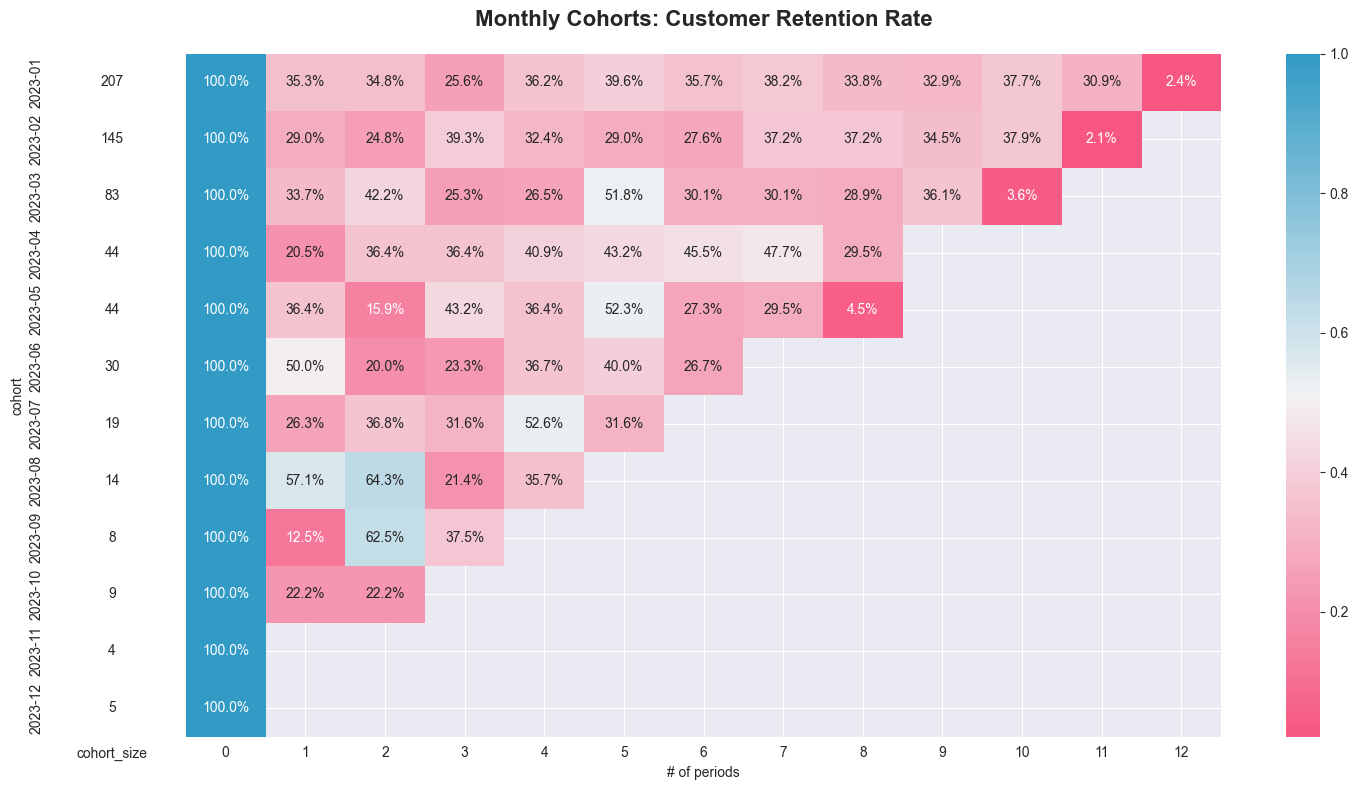

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt=".1%", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention Rate", fontsize=16, pad=20, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

### Customer Churn

In [35]:
base = cohort_pivot[0]
n_customer_churn = cohort_pivot.apply(lambda col: base - col, axis=0)
n_customer_churn[0] = base
n_customer_churn

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2023-01,207.0,134.0,135.0,154.0,132.0,125.0,133.0,128.0,137.0,139.0,129.0,143.0,202.0
2023-02,145.0,103.0,109.0,88.0,98.0,103.0,105.0,91.0,91.0,95.0,90.0,142.0,NaN
2023-03,83.0,55.0,48.0,62.0,61.0,40.0,58.0,58.0,59.0,53.0,80.0,NaN,NaN
2023-04,44.0,35.0,28.0,28.0,26.0,25.0,24.0,23.0,31.0,NaN,NaN,NaN,NaN
2023-05,44.0,28.0,37.0,25.0,28.0,21.0,32.0,31.0,42.0,NaN,NaN,NaN,NaN
2023-06,30.0,15.0,24.0,23.0,19.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,19.0,14.0,12.0,13.0,9.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,14.0,6.0,5.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,8.0,7.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


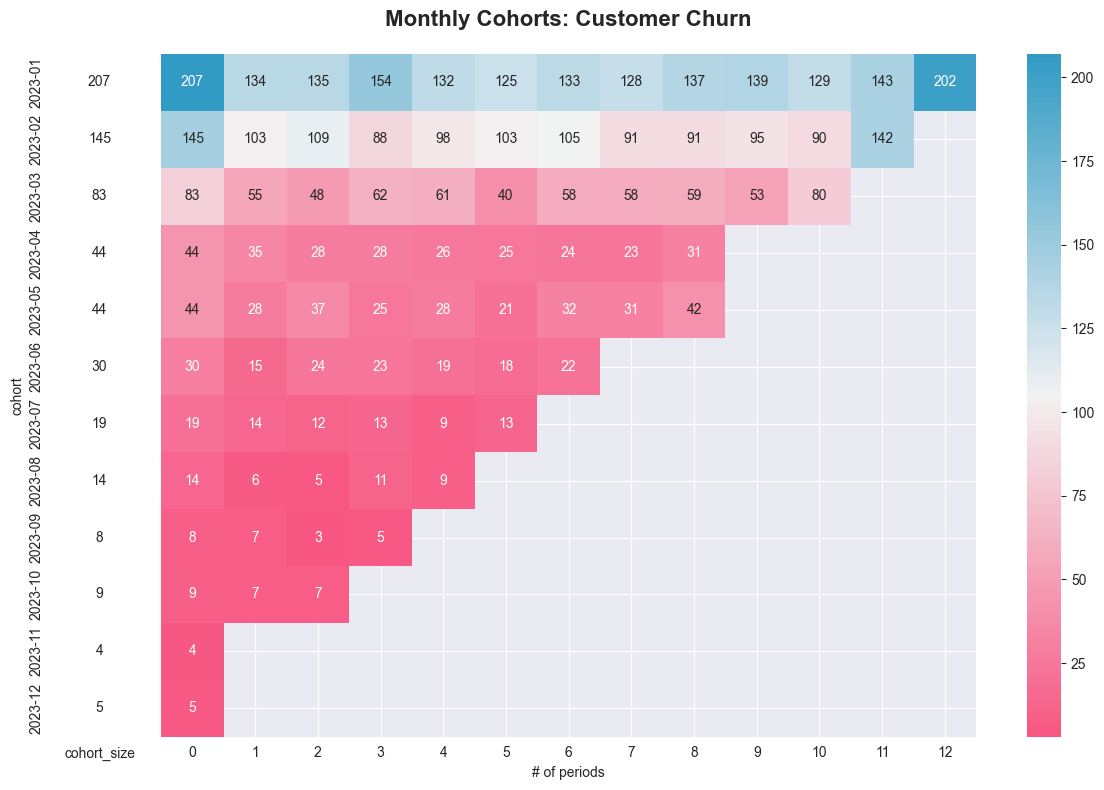

In [36]:
cohort_size_churn = n_customer_churn.iloc[:, 0]
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(n_customer_churn, mask=n_customer_churn.isnull(), annot=True, fmt=".0f", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn", fontsize=16, pad=20, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size_churn).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

In [37]:
churn_rate_matrix = n_customer_churn.divide(cohort_size_churn, axis=0)
churn_rate_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2023-01,1.0,0.647343,0.652174,0.743961,0.637681,0.603865,0.642512,0.618357,0.661836,0.671498,0.623188,0.690821,0.975845
2023-02,1.0,0.710345,0.751724,0.606897,0.675862,0.710345,0.724138,0.627586,0.627586,0.655172,0.620690,0.979310,NaN
2023-03,1.0,0.662651,0.578313,0.746988,0.734940,0.481928,0.698795,0.698795,0.710843,0.638554,0.963855,NaN,NaN
2023-04,1.0,0.795455,0.636364,0.636364,0.590909,0.568182,0.545455,0.522727,0.704545,NaN,NaN,NaN,NaN
2023-05,1.0,0.636364,0.840909,0.568182,0.636364,0.477273,0.727273,0.704545,0.954545,NaN,NaN,NaN,NaN
2023-06,1.0,0.500000,0.800000,0.766667,0.633333,0.600000,0.733333,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.736842,0.631579,0.684211,0.473684,0.684211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.428571,0.357143,0.785714,0.642857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.875000,0.375000,0.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


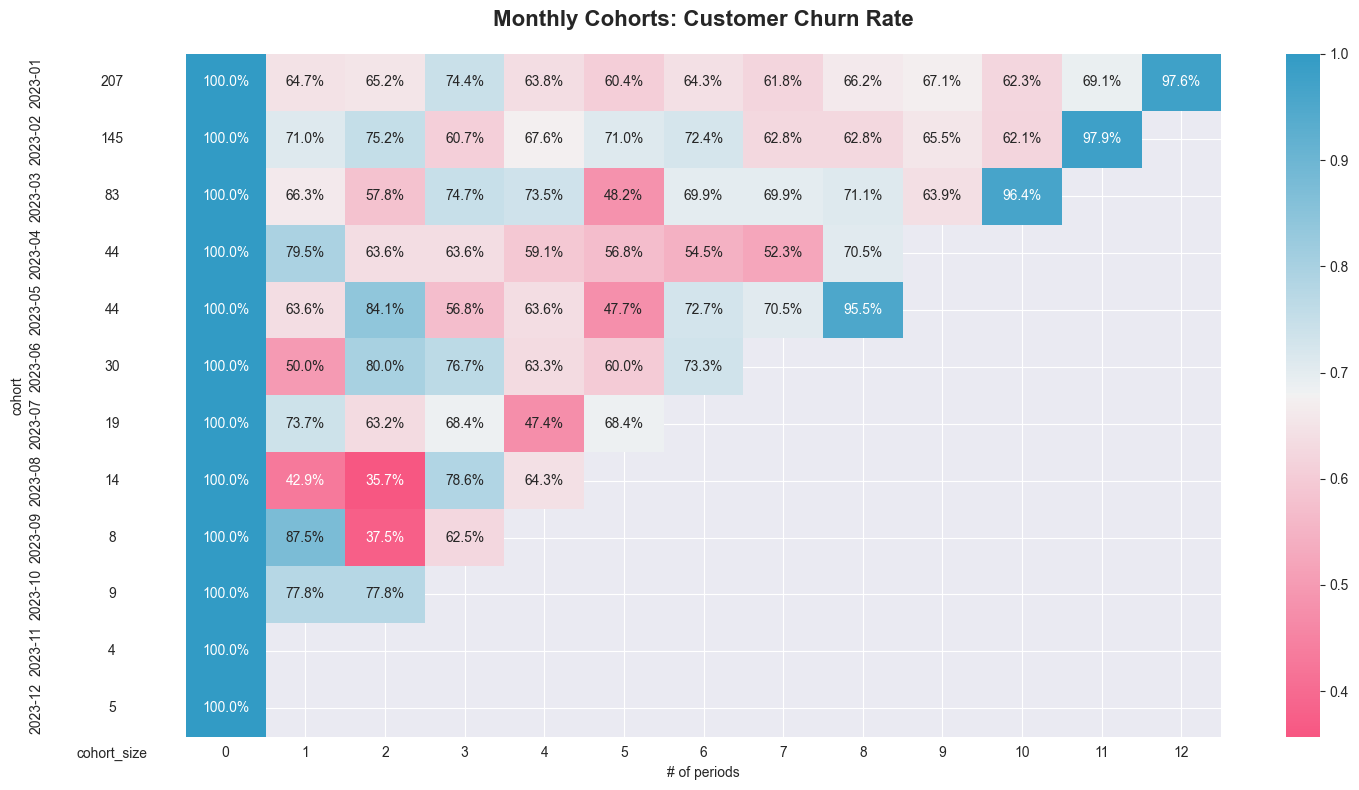

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(churn_rate_matrix, mask=churn_rate_matrix.isnull(), annot=True, fmt=".1%", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn Rate", fontsize=16, pad=20, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

### Cohort Retention & Churn Analysis

**1. Customer Retention**

* **Low and declining retention rates:**

  * After the first month, retention drops sharply. Many cohorts retain only **20–40% of customers** in months 1–2.
  * Example: The **2023-01 cohort** started with 207 customers, but by month 2 only **73 customers (35.3%)** remained active, and it fell below 10% in later months.

* **Recent cohorts show no significant improvement:**

  * Mid-2023 cohorts such as **2023-06, 2023-07, and 2023-08** maintained retention rates of **20–50%** in early periods but declined quickly afterward.

* **Key takeaway:**

  * Very few customers maintain continuous transactions across multiple months.
  * The overall pattern shows most customers transact **only once or twice** before leaving.

**2. Customer Churn**

* **High churn rates:**

  * Immediately after the first month, churn typically exceeds **60–70%**, meaning the majority of customers never return.
  * Example: The **2023-01 cohort** had 207 customers, but **134 (\~65%) churned** by the next month.

* **Consistent trend across cohorts:**

  * More recent cohorts (Q3–Q4/2023) follow the same pattern: within 2–3 months, nearly all customers churn.

* **Key characteristic:**

  * Most customers generate only **a single transaction**, with very few showing long-term engagement.

**3. Overall Observations**

* **Low retention & high churn are structural patterns:**

  * The data reflects real customer behavior, where the majority **purchase once and leave**.
  * This is not a data error but a critical insight for customer lifecycle management.

* **Business implications:**

  * Building **loyal customers** is highly challenging with this dataset.
  * Strategic initiatives are required, such as:

    * **Incentives for returning customers** (discounts, loyalty points).
    * **Reactivation campaigns** targeting early churners.
    * **Personalized experiences** to encourage repeat purchases.

**In summary:**

* Cohort analysis shows that **most customers make only 1–2 transactions**.
* **Retention declines rapidly, churn rises sharply from the first month.**
* Improving performance requires **customer retention strategies**: after-sales engagement, repurchase incentives, and enhancing the overall customer journey.

## QoQ Analysis

In [39]:
df_bank_transactions_cohort["quarter"] = df_bank_transactions["TransactionDate"].dt.to_period("Q").astype(str)

quarterly_summary = df_bank_transactions_cohort.groupby("quarter").agg(
    revenue=("TransactionAmount", "sum"),
    account_count=("AccountID", "nunique")
).reset_index()

# Calculate revenue growth (QoQ growth)
quarterly_summary["qoq_growth"] = quarterly_summary["revenue"].pct_change() * 100
quarterly_summary["qoq_growth"] = quarterly_summary["qoq_growth"].round(2)
quarterly_summary["qoq_growth_label"] = quarterly_summary["qoq_growth"].apply(
    lambda x: f"+{x}%" if pd.notnull(x) and x > 0 else (f"{x}%" if pd.notnull(x) else "–")
)
quarterly_summary

,quarter,revenue,account_count,qoq_growth,qoq_growth_label
0,2023Q1,182451.26,352,NaN,–
1,2023Q2,165431.43,339,-9.33,-9.33%
2,2023Q3,203131.40,358,22.79,+22.79%
3,2023Q4,194476.18,365,-4.26,-4.26%
4,2024Q1,2065.30,13,-98.94,-98.94%


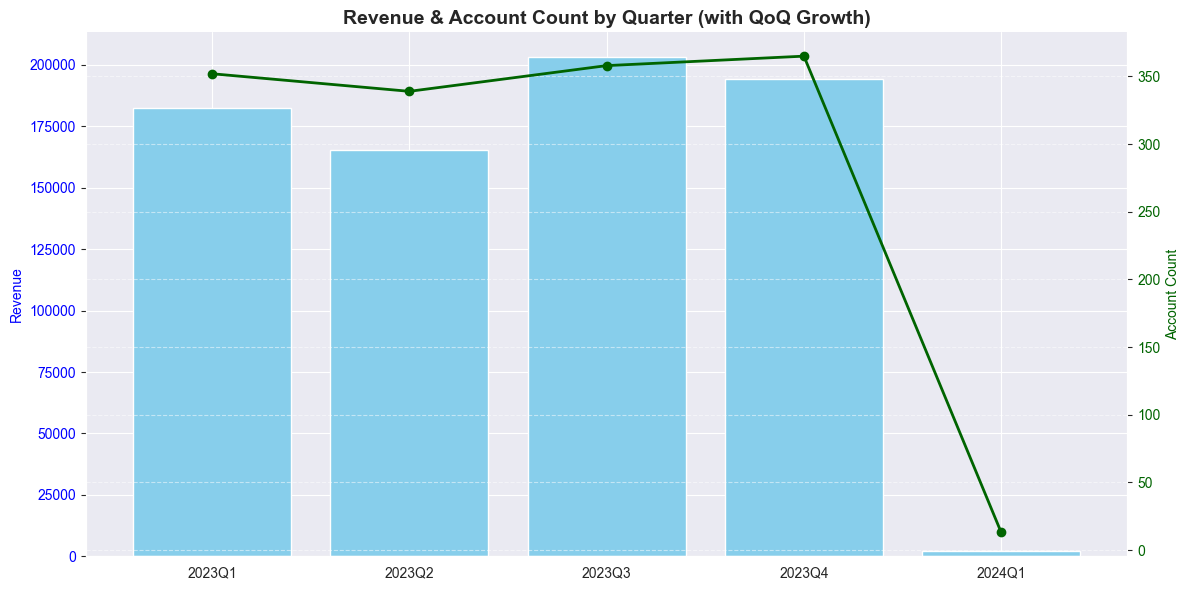

In [40]:
# Plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Revenue bars
ax1.bar(quarterly_summary["quarter"], quarterly_summary["revenue"], color="skyblue", label="Revenue")
ax1.set_ylabel("Revenue", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Secondary axis for line chart (Account Count)
ax2 = ax1.twinx()
ax2.plot(quarterly_summary["quarter"], quarterly_summary["account_count"], color="darkgreen",
         marker="o", linewidth=2, label="Account Count")
ax2.set_ylabel("Account Count", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

# Add title and format axes
plt.title("Revenue & Account Count by Quarter (with QoQ Growth)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
sns.despine(top=True, right=False, left=False, bottom=False)
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Insights from Revenue & Account Count by Quarter

1. **Revenue Trend**

   * Revenue fluctuated throughout 2023: slight decline from **Q1 → Q2**, strong increase in **Q3**, and a small dip in **Q4**.
   * In **2024Q1**, revenue dropped almost to **zero**, likely due to incomplete or missing data.

2. **Account Count Trend**

   * Account counts remained relatively stable around **200–360 accounts** during 2023.
   * In **2024Q1**, accounts dropped sharply, almost disappearing.

3. **QoQ Growth Implications**

   * 2023 shows a generally **stable performance**, with notable growth in Q3.
   * The unusual drop in **2024Q1** is most likely caused by **data issues** rather than an actual business decline.

👉 In summary: 2023 was stable with positive growth in Q3, but **2024Q1 anomalies** indicate a need to validate the dataset.

## Let's address some questions

### What is the distribution of transaction amounts specifically within the top 5% of transactions by TransactionType?

Number of high-value transactions (top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51,Midwest
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07,Midwest
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,South
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35,Midwest
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24,South


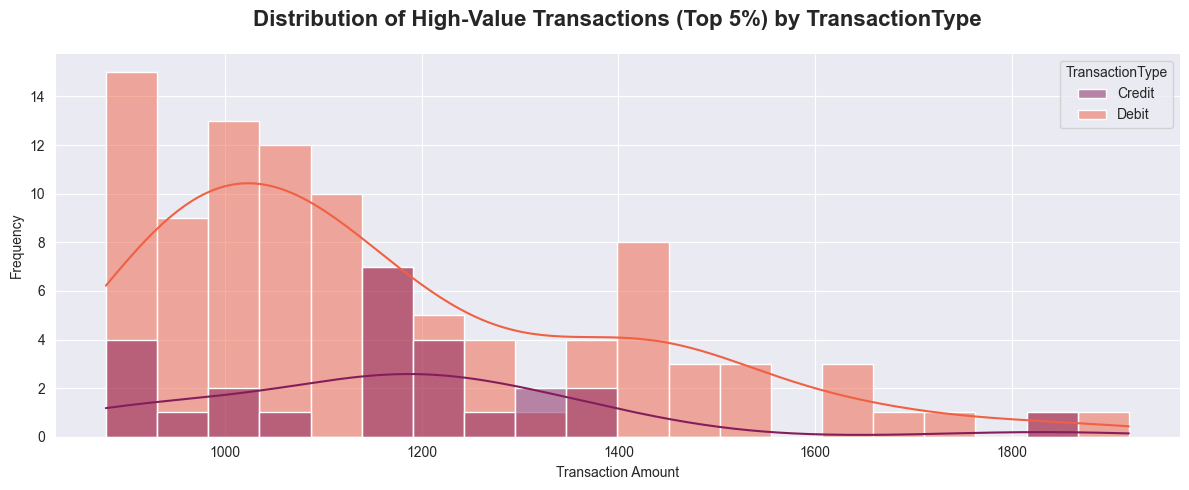

In [41]:
high_value_threshold = df_bank_transactions["TransactionAmount"].quantile(0.95)
high_value_transactions = df_bank_transactions[df_bank_transactions["TransactionAmount"] > high_value_threshold]

print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(12, 5))
sns.histplot(data=high_value_transactions, x="TransactionAmount", hue="TransactionType",
             bins=20, kde=True, palette="rocket")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of High-Value Transactions (Top 5%) by TransactionType", fontsize=16, pad=20, weight="bold")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight**

* **High-value transactions (Top 5%)** are mainly **Debit**, accounting for the majority of frequency.
* **Credit** transactions appear less frequently and are more scattered across values.
* Most high-value transactions fall within the **900–1300** range, then gradually decrease as the transaction amount increases.

-> This indicates that **Debit** is the dominant type in high-value transactions.

### What is the distribution of high-value transaction amounts for each transaction channel (Online, ATM, Branch)?

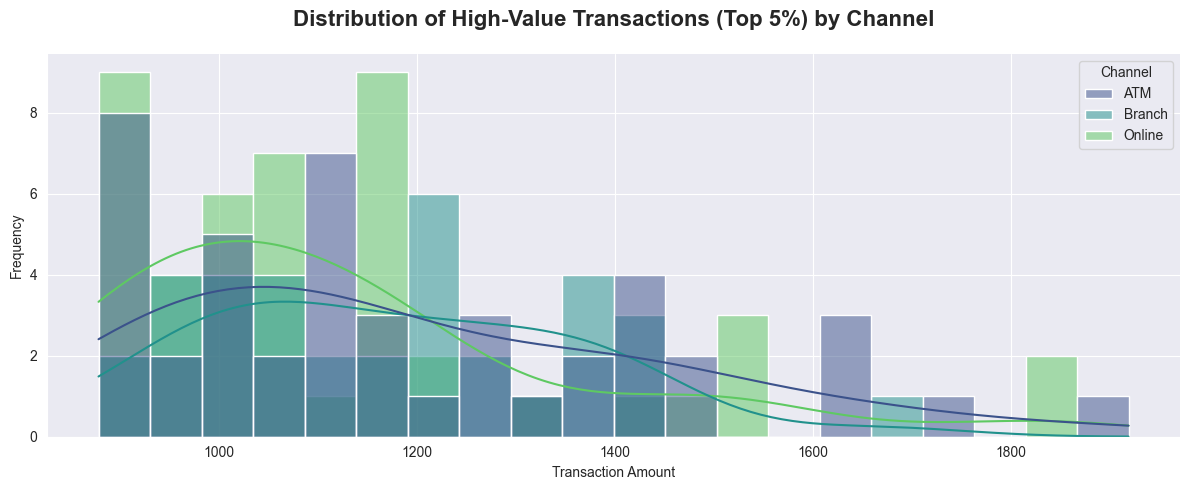

In [42]:
# Plot high-value transactions
plt.figure(figsize=(12, 5))
sns.histplot(data=high_value_transactions, x="TransactionAmount", hue="Channel",
             bins=20, kde=True, palette="viridis")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of High-Value Transactions (Top 5%) by Channel", fontsize=16, pad=20, weight="bold")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight**

* High-value transactions (Top 5%) are distributed across **Online**, **ATM**, and **Branch**, but **Online** and **ATM** dominate compared to Branch.
* The main concentration of transaction values is in the **900–1300** range, after which the frequency gradually declines.
* **Online** shows a wider spread, while **Branch** transactions are less common at very high values.

👉 This indicates that **Online and ATM channels** play the primary role in high-value transactions.

### What is the distribution of high-value transaction amounts for each customer occupation represented in the dataset?¶

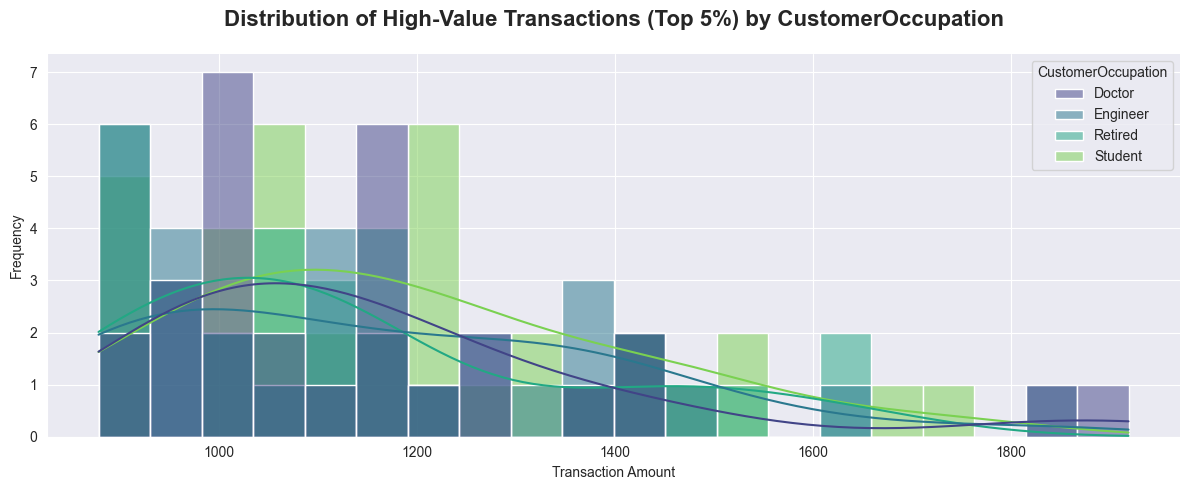

In [43]:
# Plot high-value transactions
plt.figure(figsize=(12, 5))
sns.histplot(data=high_value_transactions, x="TransactionAmount", hue="CustomerOccupation",
             bins=20, kde=True, palette="viridis")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of High-Value Transactions (Top 5%) by CustomerOccupation", fontsize=16, pad=20, weight="bold")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight**

* High-value transactions (Top 5%) are distributed across all occupations: **Student, Retired, Engineer, and Doctor**.
* **Students and Engineers** show slightly higher frequencies, while **Doctors and Retired** customers contribute more sporadically.
* The main concentration of high-value transactions lies in the **900–1300** range, with fewer cases at very high amounts (>1600).

-> This suggests that **Students and Engineers are more active in high-value transactions**, while **Doctors and Retired customers appear less frequently** in this segment.

### What is the distribution of time differences between frequent transactions?

Number of frequent transactions (within 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,West,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,Midwest,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,West,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,Northeast,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,West,2480.0


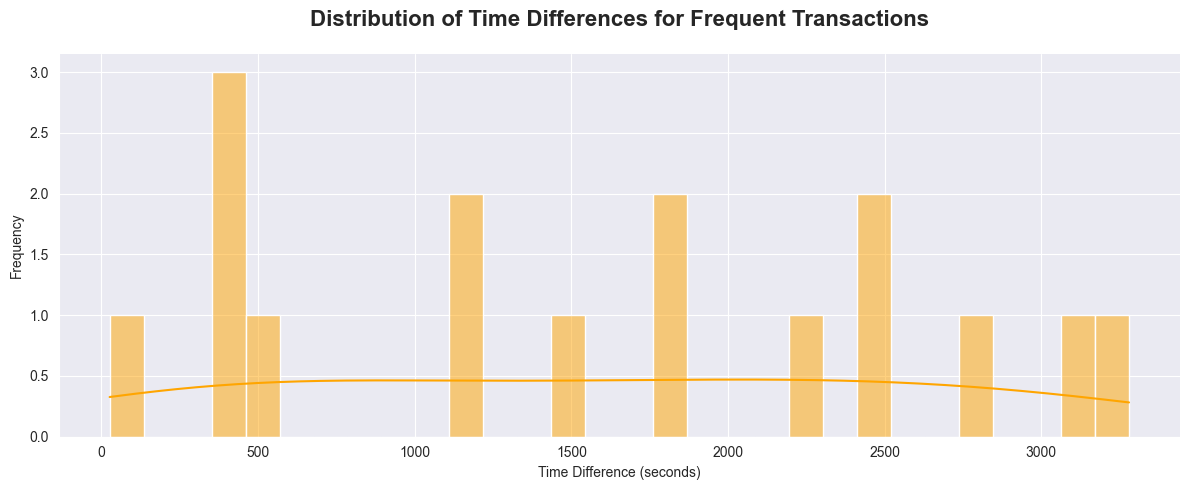

In [44]:
df_sorted = df_bank_transactions.sort_values(by=["AccountID", "TransactionDate"])
df_sorted["TimeDifference"] = df_sorted.groupby("AccountID")["TransactionDate"].diff().dt.total_seconds()

# Identify frequent transactions with short intervals
short_interval_threshold = 3600  # 1 hour in seconds
frequent_transactions = df_sorted[df_sorted["TimeDifference"] <= short_interval_threshold]
print(f"Number of frequent transactions (within 1 hour): {len(frequent_transactions)}")
display(frequent_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(12, 5))
sns.histplot(frequent_transactions["TimeDifference"], bins=30, kde=True, color = "orange")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of Time Differences for Frequent Transactions", fontsize=16, pad=20, weight="bold")
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight**

This analysis can help identify accounts with rapid transaction sequences, which may be indicative of automated transactions, potential fraud, or unusual activity patterns.

### What is the overall distribution of balance changes in the dataset?

Number of transactions with large balance changes: 105


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region,TimeDifference,BalanceChange
1167,TX001168,AC00010,838.57,2023-06-26 16:08:25,Debit,D000430,115.30.82.168,M040,ATM,41,Doctor,273,1,14576.47,2024-11-04 08:11:25,West,3018459.0,12970.80
519,TX000520,AC00014,121.91,2023-06-26 18:39:52,Debit,D000264,135.29.211.116,M015,Branch,60,Doctor,133,1,14510.80,2024-11-04 08:08:59,Midwest,1132165.0,14118.46
2086,TX002087,AC00029,1192.95,2023-12-04 18:30:00,Debit,D000227,71.93.189.160,M068,Branch,23,Student,73,1,325.15,2024-11-04 08:08:01,West,431479.0,-14064.30
1589,TX001590,AC00035,70.88,2023-12-04 16:18:39,Credit,D000315,169.67.220.37,M087,Branch,74,Retired,176,1,1794.65,2024-11-04 08:06:26,Midwest,3015257.0,-13038.69
180,TX000181,AC00036,740.25,2023-07-19 17:03:58,Debit,D000030,1.198.76.182,M010,Online,41,Doctor,123,1,14464.30,2024-11-04 08:08:27,Northeast,5352536.0,12789.36


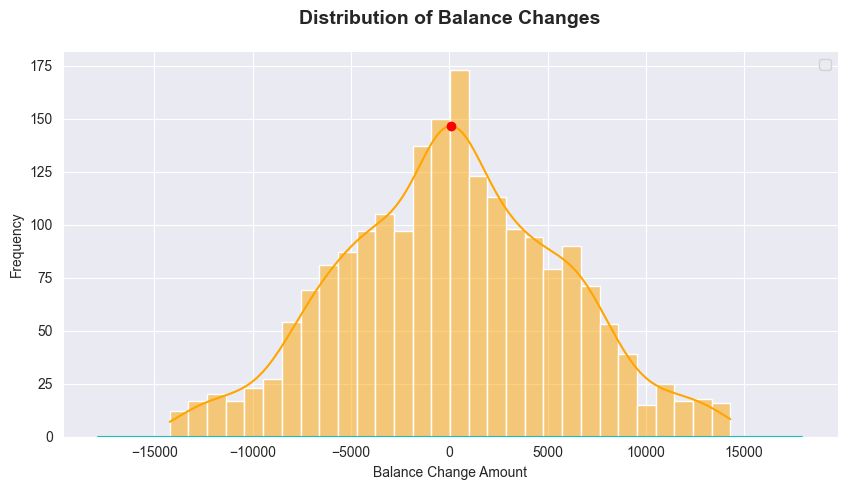

In [45]:
from scipy.signal import find_peaks

# Calculate balance change = current balance - previous balance
df_sorted["BalanceChange"] = df_sorted.groupby("AccountID")["AccountBalance"].diff()

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df_sorted['BalanceChange'].mean() + 2 * df_sorted['BalanceChange'].std()
large_balance_changes = df_sorted[df_sorted['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# 4. Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df_sorted['BalanceChange'], bins=30, kde=True, color="orange")
sns.despine(top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_sorted["BalanceChange"], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.title("Distribution of Balance Changes", fontsize=14, pad=20, weight="bold")
plt.xlabel("Balance Change Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Insight:**

This approach captures unusual transactions by identifying large deviations in balance changes, accounting for transaction types. It helps flag potential fraud based on substantial deviations from typical account behavior.

### What is the proportion of credit versus debit transactions associated with large balance changes?¶

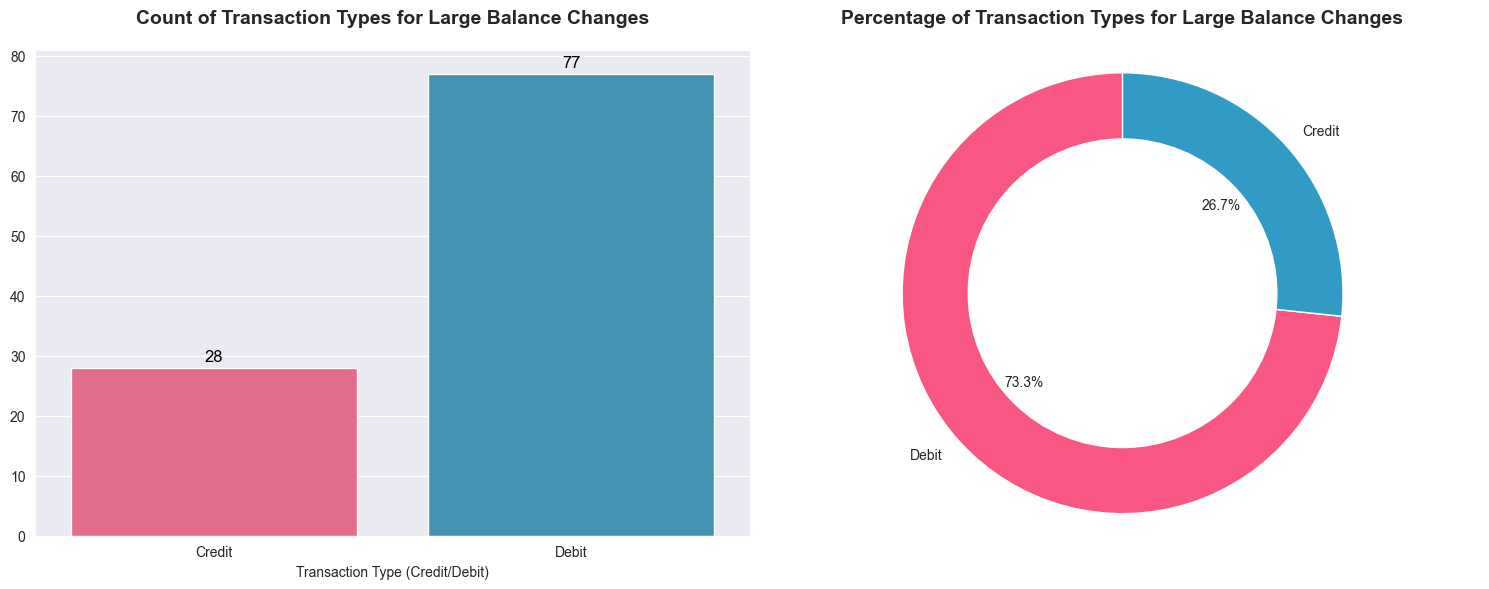

In [46]:
# Group large balance changes by TransactionType and count occurrences
transaction_type_counts = large_balance_changes["TransactionType"].value_counts()

# Function to display barplot and pie chart for categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="TransactionType", data=large_balance_changes, ax=ax[0], palette=color(n_colors=2))
ax[0].set_title("Count of Transaction Types for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Transaction Type (Credit/Debit)")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

wedges, texts, autotexts = ax[1].pie(
    transaction_type_counts,
    labels=transaction_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=color(n_colors=2)
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax[1].set_title("Percentage of Transaction Types for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[1].axis("equal")
plt.tight_layout()
plt.show()


**Insight**

- The bar chart and pie chart clearly show that debit transactions are significantly more frequent than credit transactions when it comes to large balance changes.

**Implications:** 
- Fraud Risk: The higher proportion of debit transactions associated with large balance changes could potentially indicate a higher risk of fraudulent activity related to debit transactions.

### What is the distribution of transaction channels associated with large balance changes?

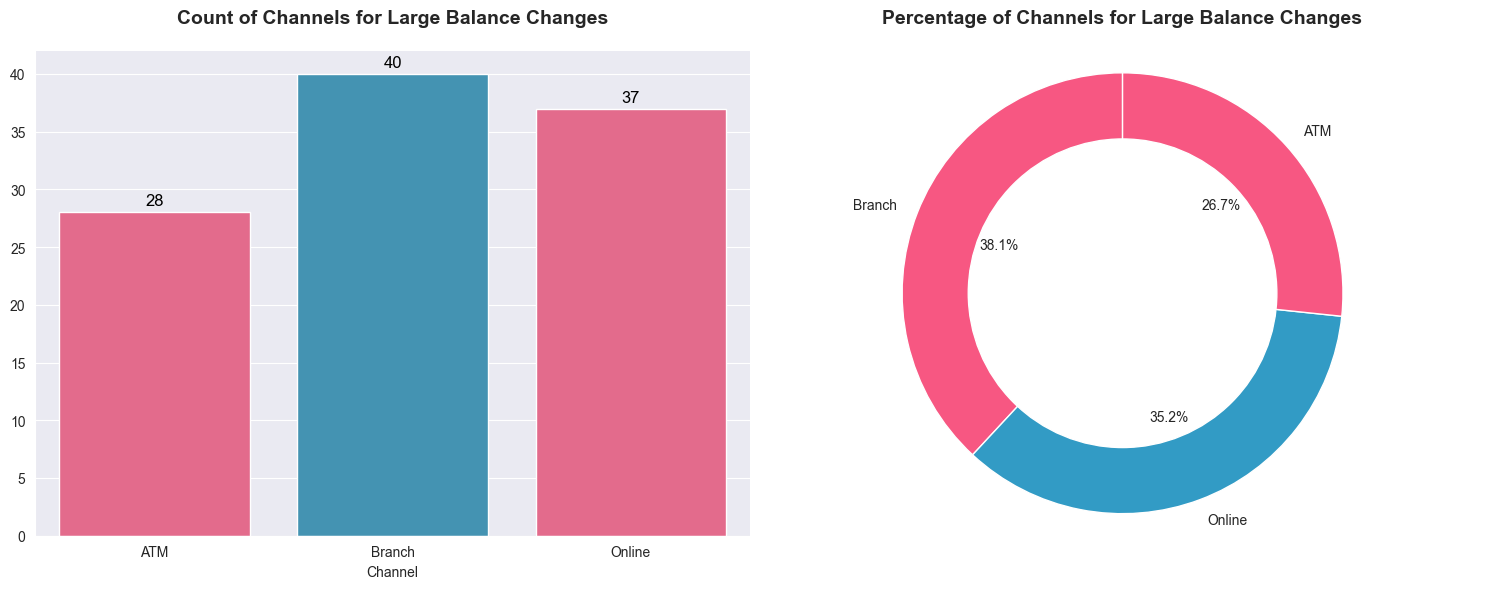

In [47]:
# Group large balance changes by Channel and count occurrences
channel_counts = large_balance_changes["Channel"].value_counts()

# Function to display barplot and pie chart for categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="Channel", data=large_balance_changes, ax=ax[0], palette=color(n_colors=2))
ax[0].set_title("Count of Channels for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Channel")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

wedges, texts, autotexts = ax[1].pie(
    channel_counts,
    labels=channel_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=color(n_colors=2)
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax[1].set_title("Percentage of Channels for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[1].axis("equal")
plt.tight_layout()
plt.show()


**Insight**

* **Visual Observation**:

  * Large balance changes occur most frequently via **Branch transactions (40 cases, 38.1%)**, followed by **Online (37 cases, 35.2%)**, and least through **ATM (28 cases, 26.7%)**.

* **Implications**:

  1. **Branch dominance** suggests that in-person transactions are more associated with substantial balance fluctuations, possibly due to **larger withdrawals/deposits**.
  2. **Online channels** also show a high share, indicating potential risk from **digital fraud or high-value online transfers**.
  3. **ATM transactions**, though lower, still account for more than a quarter, reflecting risks in **cash-based activity**.

**Conclusion**:
Both **Branch and Online channels** are key points of concern for large balance changes, while **ATM activity** remains a secondary but notable risk.

### Who are the top 10 merchants (by MerchantID) associated with the largest number of large balance changes?

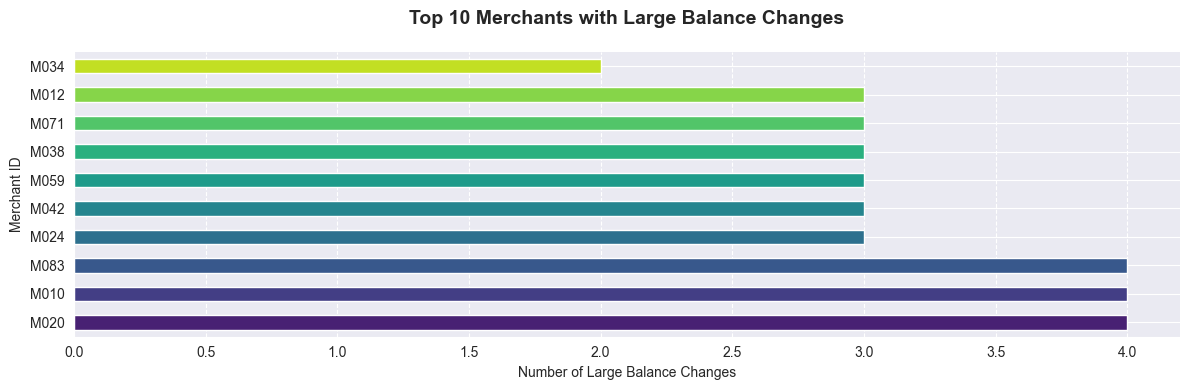

In [48]:
# Merchants
merchant_counts = large_balance_changes["MerchantID"].value_counts().nlargest(10)  

plt.figure(figsize=(12, 4))  
merchant_counts.plot(kind="barh", color=sns.color_palette("viridis", 10))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Top 10 Merchants with Large Balance Changes", fontsize=14, pad=20, weight="bold")
plt.xlabel("Number of Large Balance Changes")
plt.ylabel("Merchant ID")
plt.grid(axis="x", linestyle="--")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * Top 10 merchants associated with large balance changes range from **2 to 4 incidents**.
  * **Merchants M010, M083, and M020** lead with the highest number (**4 cases each**), while others show **moderate involvement** (2–3 cases).

* **Implications**:

  1. The recurrence of large balance changes across specific merchants may indicate **unusual customer behavior** or **potential fraud patterns**.
  2. High-frequency merchants should be **prioritized for further investigation**, especially if combined with risky transaction types or channels.
  3. The relatively narrow gap between merchants suggests a **broad distribution of risk**, not overly concentrated in a single entity.

### What are the region associated with the largest number of large balance changes?

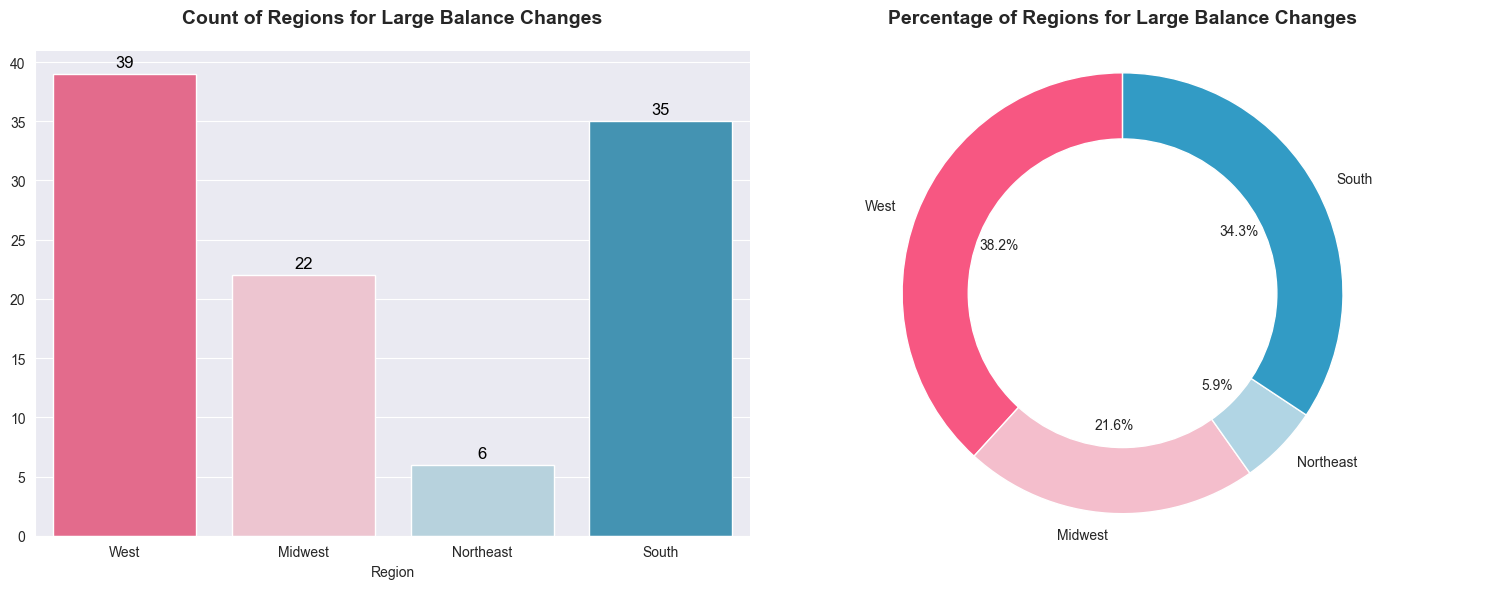

In [49]:
# Group large balance changes by Region and count occurrences
region_order = ["West", "Midwest", "Northeast", "South"]
region_counts = large_balance_changes["Region"].value_counts().reindex(region_order)

# Function to display barplot and pie chart for categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="Region", data=large_balance_changes, ax=ax[0], palette=color(n_colors=4), order=region_order)
ax[0].set_title("Count of Regions for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

wedges, texts, autotexts = ax[1].pie(
    region_counts,
    labels=region_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=color(n_colors=4)
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax[1].set_title("Percentage of Regions for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[1].axis("equal")
plt.tight_layout()
plt.show()


**Insight**

* **Visual Observation**:

  * Large balance changes are concentrated primarily in the **West (39 cases, 38.2%)** and **South (35 cases, 34.3%)** regions.
  * The **Midwest** accounts for a moderate share (**22 cases, 21.6%**), while the **Northeast** has the lowest count with only **6 cases (5.9%)**.

* **Implications**:

  1. The **West and South** regions exhibit the **highest frequency of large balance changes**, potentially due to **higher financial activity**, **larger populations**, or **increased fraud risk**.
  2. The **Midwest** maintains a moderate level, which may reflect more **stable financial behavior** or **fewer anomalies**.
  3. The **Northeast**, while having the lowest count, should be assessed further to determine whether this is due to **lower transaction volume**, **fewer customers**.

### What is the distribution of large balance changes across the hours of the day? Are there specific times when large balance changes are more frequent?¶

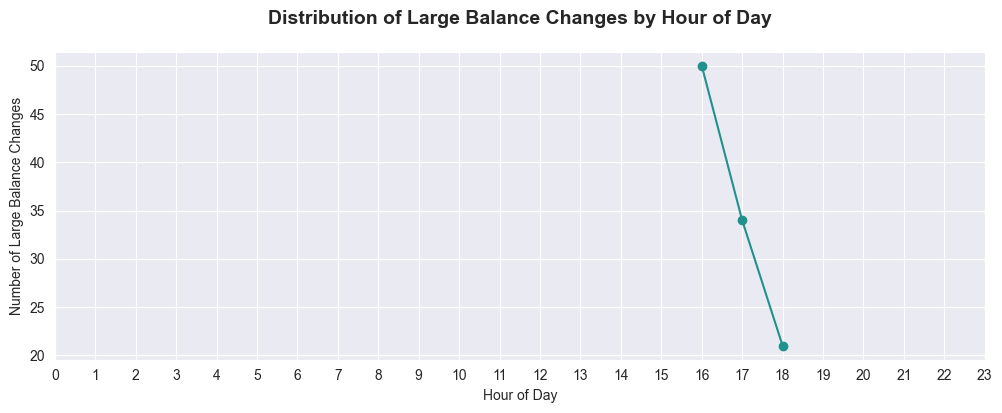

In [50]:
large_balance_changes["TransactionHour"] = large_balance_changes["TransactionDate"].dt.hour

hour_counts = large_balance_changes["TransactionHour"].value_counts()

plt.figure(figsize=(12, 4))  
plt.plot(hour_counts.index, hour_counts.values, color=sns.color_palette("viridis", 1)[0], marker="o") 
plt.title("Distribution of Large Balance Changes by Hour of Day", fontsize=14, pad=20, weight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Large Balance Changes")
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Insight**

* **Visual Observation**:

  * Large balance changes are **concentrated in a narrow time window**, specifically between **16:00 and 18:00**.
  * The highest number occurs at **16:00 (50 cases)**, followed by **17:00 (34 cases)**, and lowest at **18:00 (21 cases)**.
  * No large balance changes are observed **outside of this 3-hour range**.

* **Implications**:

  1. The sharp peak at 16:00 suggests a strong **time-of-day effect**, possibly linked to **end-of-day business transactions** or **cutoff times for fund transfers**.
  2. The decreasing trend from 16:00 to 18:00 may reflect a **drop in system activity**, or stricter controls approaching the end of operational hours.


### What is the distribution of large balance changes across the days of the week? Are there specific days when large balance changes are more frequent?¶

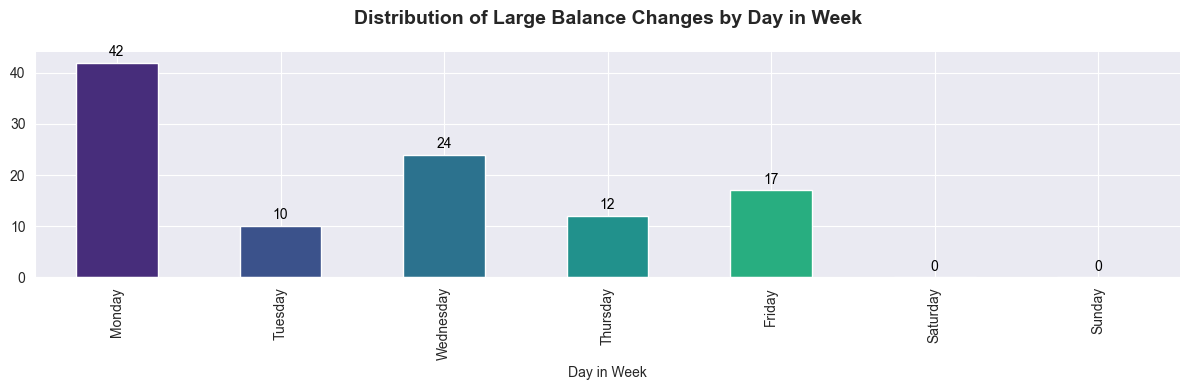

In [51]:
large_balance_changes["TransactionDayInWeek"] = large_balance_changes["TransactionDate"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_in_week_counts = large_balance_changes["TransactionDayInWeek"].value_counts().reindex(day_order)

plt.figure(figsize=(12, 4))  
ax = day_in_week_counts.plot(kind="bar", color=sns.color_palette("viridis", 7))
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=10,
                     xytext=(0, 5),
                     textcoords="offset points")

plt.title("Distribution of Large Balance Changes by Day in Week", fontsize=14, pad=20, weight="bold")
plt.xlabel("Day in Week")
plt.ylabel("")
# plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

**Insight**

The bar chart clearly shows that Monday has the highest number of large balance changes. This suggests that a significant portion of large account balance fluctuations occur at the beginning of the week.

### What is the distribution of customer occupations associated with large balance changes?

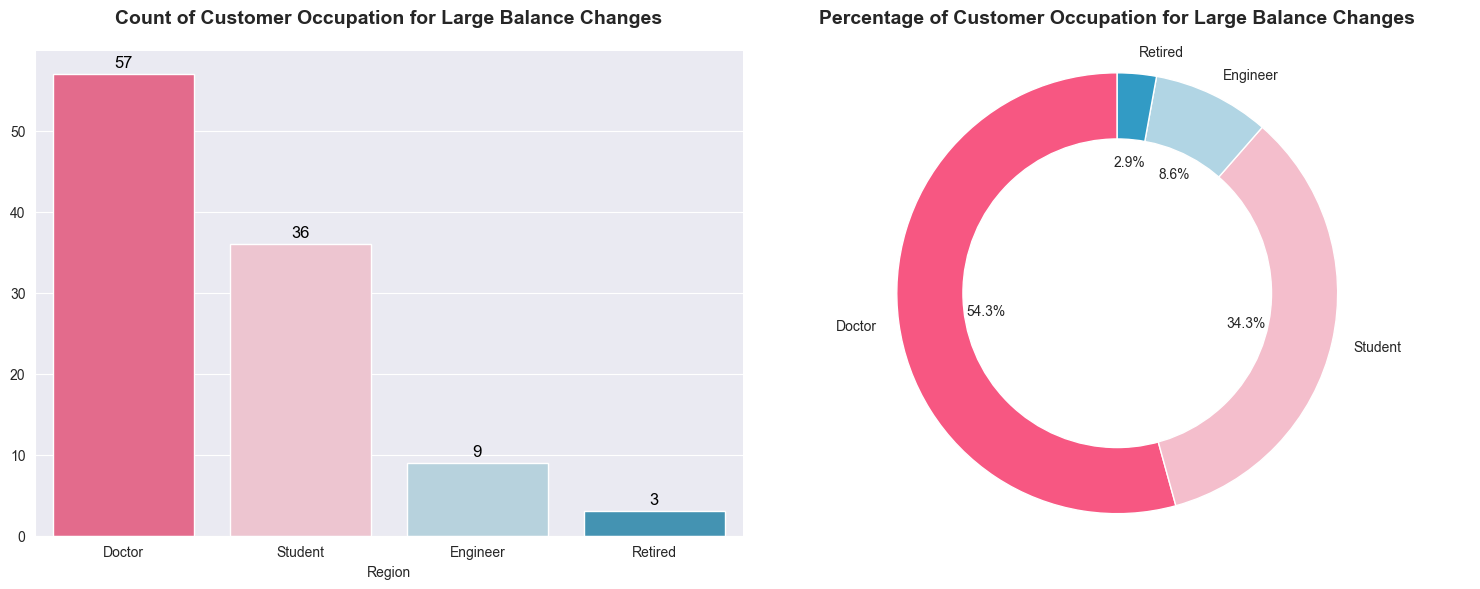

In [52]:
# Group large balance changes by CustomerOccupation and count occurrences
occupation_order = ["Doctor", "Student", "Engineer", "Retired"]
customer_occupation_counts = large_balance_changes["CustomerOccupation"].value_counts().reindex(occupation_order)

# Function to display barplot and pie chart for categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="CustomerOccupation", data=large_balance_changes, ax=ax[0], 
              palette=color(n_colors=4), order=occupation_order)
ax[0].set_title("Count of Customer Occupation for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

wedges, texts, autotexts = ax[1].pie(
    customer_occupation_counts,
    labels=customer_occupation_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=color(n_colors=4)
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax[1].set_title("Percentage of Customer Occupation for Large Balance Changes", fontsize=14, pad=20, weight="bold")
ax[1].axis("equal")
plt.tight_layout()
plt.show()


**Insight**

* **Visual Observation**:

  * Customers with occupation as **Doctor (57 cases, 54.3%)** and **Student (36 cases, 34.3%)** account for the vast majority of large balance changes.
  * **Engineers** contribute **9 cases (8.6%)**, while **Retired individuals** are minimal with only **3 cases (2.9%)**.

* **Implications**:

  1. The dominance of **Doctors** suggests they may be involved in **higher-value transactions**, possibly due to **income volatility** or **business-related fund movements**.
  2. A significant share of **Students** could point to **irregular financial behavior**, **sponsorships**, or **external fund inflows**.
  3. The relatively low involvement of **Engineers** and **Retired individuals** may reflect **more stable or conservative financial patterns**.

### What is the relationship between the number of login attempts and the distribution of transaction amounts?

,LoginAttempts,Count,Mean,Median,Std
1,2,27,334.077778,278.880000,286.937819
4,5,32,308.961875,250.240000,296.422817
0,1,2390,298.027054,211.270000,292.775303
2,3,31,265.923871,280.610000,194.163349
3,4,32,253.762188,131.350000,316.821964


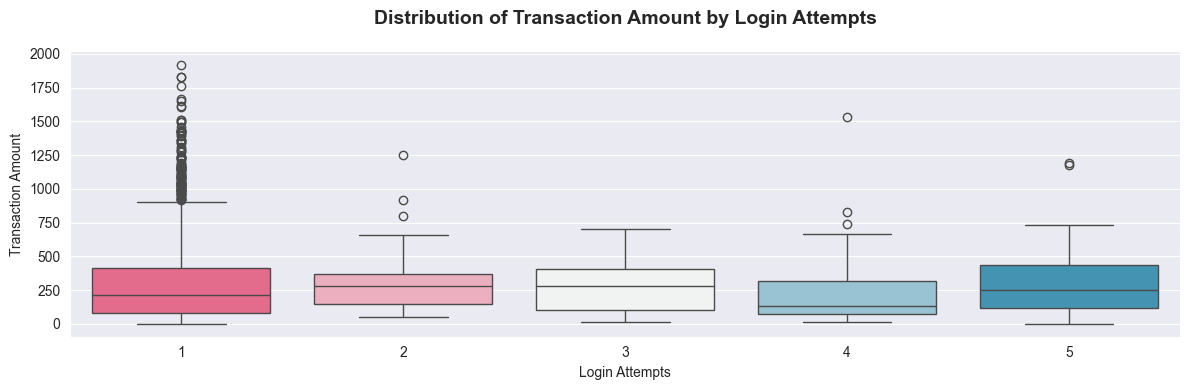

In [53]:
def distribution_target_feature_by_feature(feature, target_feature, df):
    from IPython.core.display import HTML
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    df_summary_feature = df.groupby(by=feature, as_index=False)\
    .agg(
        Count = (target_feature, "count"),
        Mean = (target_feature, "mean"),
        Median = (target_feature, "median"),
        Std = (target_feature, "std")
    )
    cm = sns.light_palette("blue", as_cmap=True)
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

distribution_target_feature_by_feature(feature="LoginAttempts", target_feature="TransactionAmount", df=df_bank_transactions)

plt.figure(figsize=(12, 4))  
sns.boxplot(data=df_bank_transactions, x="LoginAttempts", y="TransactionAmount", 
            palette=color(df_bank_transactions["LoginAttempts"].nunique()))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of Transaction Amount by Login Attempts", fontsize=14, pad=20, weight="bold")
plt.xlabel("Login Attempts")
plt.ylabel("Transaction Amount")
# plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * The **1 login attempt** group dominates with **2,390 transactions**, a median of around **211**, and many high-value outliers (up to \~2000).
  * Groups with **2 to 5 login attempts** have very small transaction counts (only 27–32), with medians ranging from **131–280**, and fewer but still notable outliers.
  * The average values across groups are relatively similar (around **250–330**), while the standard deviations are quite high (200–316), indicating significant variability in transaction amounts.

* **Implications**:

  1. The **1 login attempt** group is the **critical risk group**, both because of its overwhelming volume and the presence of unusually high-value transactions.
  2. Groups with **multiple login attempts (2–5)** are much smaller in scale, possibly representing more cautious users or those facing access difficulties, but their transaction amounts appear **more stable and moderate**.
  3. The consistently high standard deviations across all groups highlight **uneven financial behavior**, suggesting the need for additional variables to gain deeper insights.

### What is the distribution of login attempts for each transaction type (Credit/Debit)?

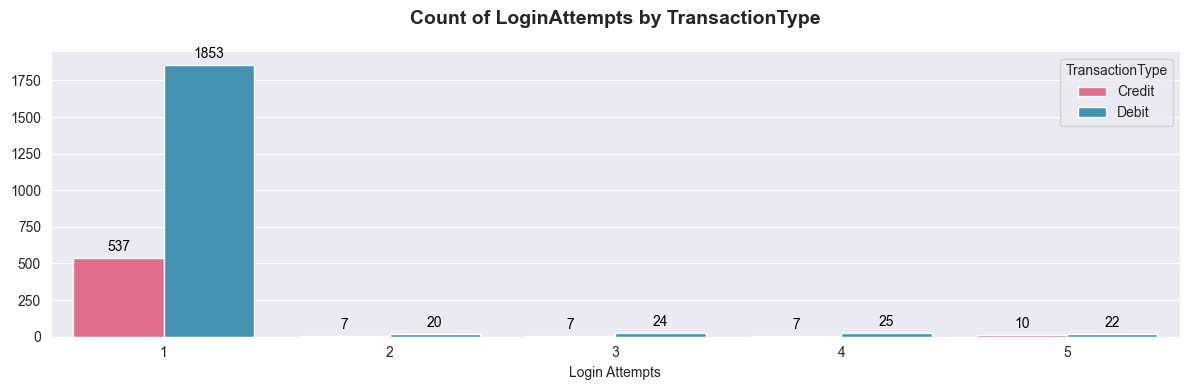

In [54]:
plt.figure(figsize=(12, 4))  
ax = sns.countplot(data=df_bank_transactions, x="LoginAttempts", hue="TransactionType",
              palette=color(n_colors=df_bank_transactions["TransactionType"].nunique()))
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{int(p.get_height())}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="baseline",
                        color="black", fontsize=10,
                        xytext=(0, 5),
                        textcoords="offset points")

plt.title("Count of LoginAttempts by TransactionType", fontsize=14, pad=20, weight="bold")
plt.xlabel("Login Attempts")
plt.ylabel("")
# plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * The majority of transactions are concentrated in the **1 login attempt** group, where **Debit (1853 transactions)** dominates compared to **Credit (537 transactions)**.
  * Groups with **2–5 login attempts** have very few transactions (only 7–25 per group), making them negligible compared to the single-attempt group.
  * Across higher login attempts, **Debit** still holds the majority, but the gap with **Credit** is less pronounced.

* **Implications**:

  1. The **1 login attempt** group is the most critical, not only because of its overwhelming transaction volume but also due to the clear Debit–Credit imbalance.
  2. The sharp drop in transaction counts with more login attempts may indicate that **users typically complete their transactions on the first login**.
  3. The dominance of Debit across most groups suggests that **risks are more concentrated on outflows (spending)** rather than inflows (Credit).

### What is the distribution of login attempts for each channel (Online, ATM, Branch, etc.)?

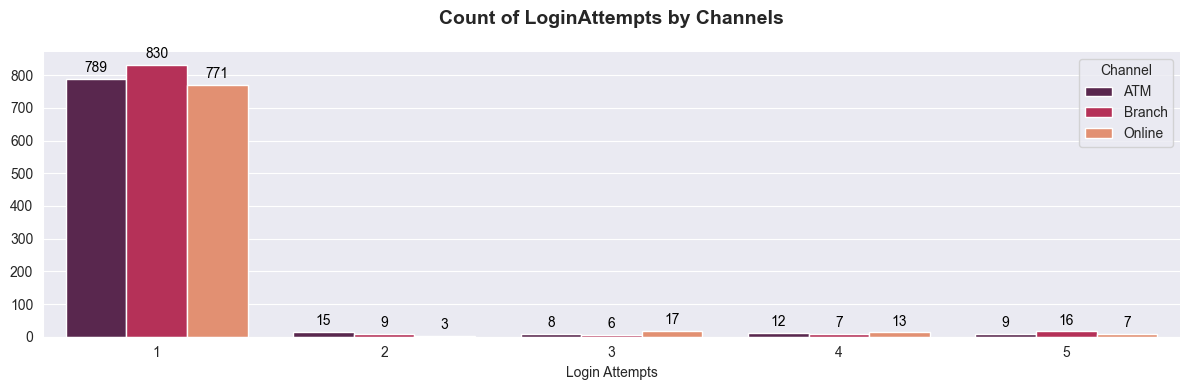

In [55]:
plt.figure(figsize=(12, 4))  
ax = sns.countplot(data=df_bank_transactions, x="LoginAttempts", hue="Channel",
              palette="rocket")
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{int(p.get_height())}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="baseline",
                        color="black", fontsize=10,
                        xytext=(0, 5),
                        textcoords="offset points")

plt.title("Count of LoginAttempts by Channels", fontsize=14, pad=20, weight="bold")
plt.xlabel("Login Attempts")
plt.ylabel("")
# plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * Most transactions occur in the **1 login attempt** group, where the channels **Branch (830)**, **ATM (789)**, and **Online (771)** show nearly equal volumes.
  * Groups with **2–5 login attempts** contain very few transactions (fewer than 20 per group), spread across all three channels.
  * No single channel dominates as login attempts increase, although **Branch** tends to be slightly higher.

* **Implications**:

  1. **Most transactions are completed successfully on the first login attempt**, regardless of the channel used (ATM, Online, or Branch).
  2. The relative balance among the three channels in the 1-login group indicates **no absolute dominance by any channel**, though **Branch** holds a slight edge.
  3. Multiple login attempts (2–5) likely reflect **exceptions or access difficulties**, but their low frequency means limited overall impact.

### How many transactions involve more than one login attempt?

In [56]:
# Transactions with more than onelogin attempt
df_bank_transactions["LoginAttempts"] = df_bank_transactions["LoginAttempts"].astype(int)
high_login_attemps = df_bank_transactions[df_bank_transactions["LoginAttempts"] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attemps)}")
display(high_login_attemps.head())

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,South
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,South
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,Northeast
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,West
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,South


### For transactions with more than one login attempt <br>
what is the distribution of transaction types (credit vs. debit)? <br>
what is the distribution of transaction channels?

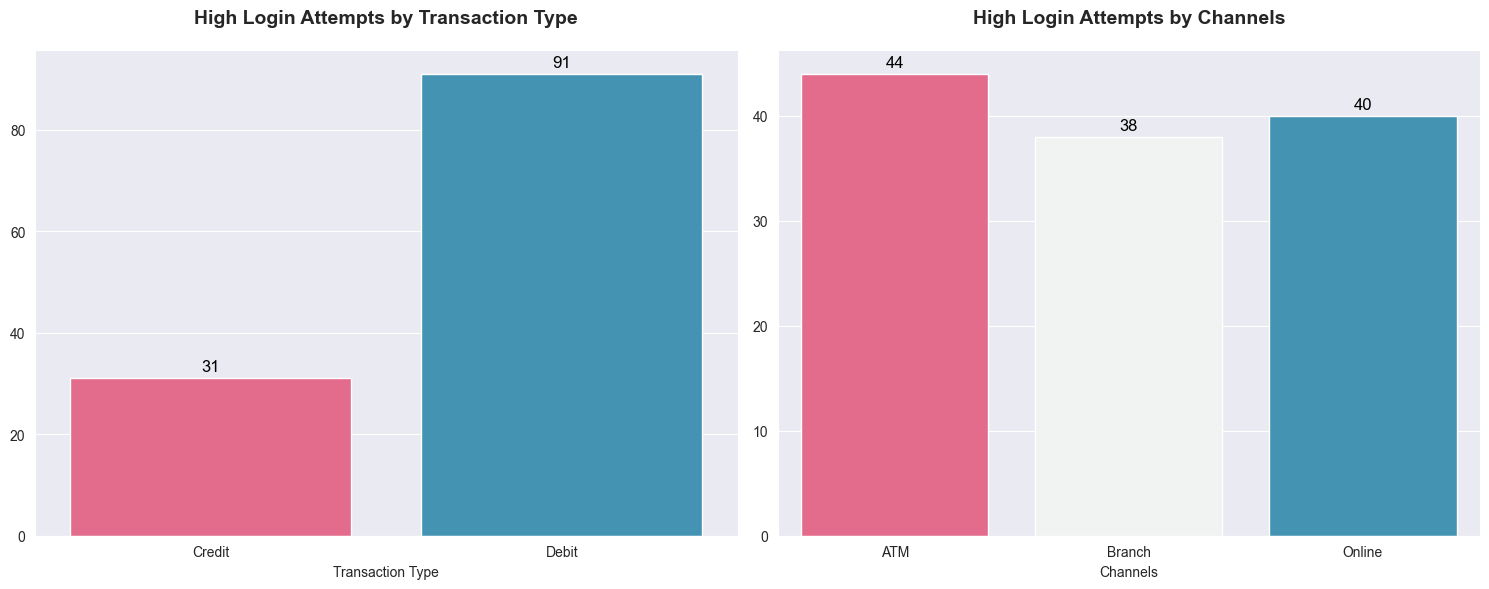

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="TransactionType", data=high_login_attemps, ax=ax[0], palette=color(n_colors=2))
ax[0].set_title("High Login Attempts by Transaction Type", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Transaction Type")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

sns.countplot(x="Channel", data=high_login_attemps, ax=ax[1], palette=color(n_colors=3))
ax[1].set_title("High Login Attempts by Channels", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Channels")
ax[1].set_ylabel("")

for p in ax[1].patches:
    ax[1].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=12,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[1].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * By **Transaction Type**: **Debit (91)** clearly dominates over **Credit (31)** in high login attempt cases.
  * By **Channels**: **ATM (44)**, **Online (40)**, and **Branch (38)** show relatively balanced distributions, with no single channel overwhelmingly dominant.

* **Implications**:

  1. The dominance of **Debit** suggests that withdrawal/spending transactions are more prone to multiple login attempts, potentially linked to **higher risk or fraud-related activities** requiring additional verification.
  2. The near-equal counts across **ATM, Online, and Branch** indicate that this phenomenon is **evenly distributed** across channels rather than concentrated in one specific channel.
  3. The presence of multiple login attempts across all three channels may reflect **user experience issues** or signal **suspicious behavior being intercepted by the system**.

### What is the distribution of the number of unique regions visited by each account?

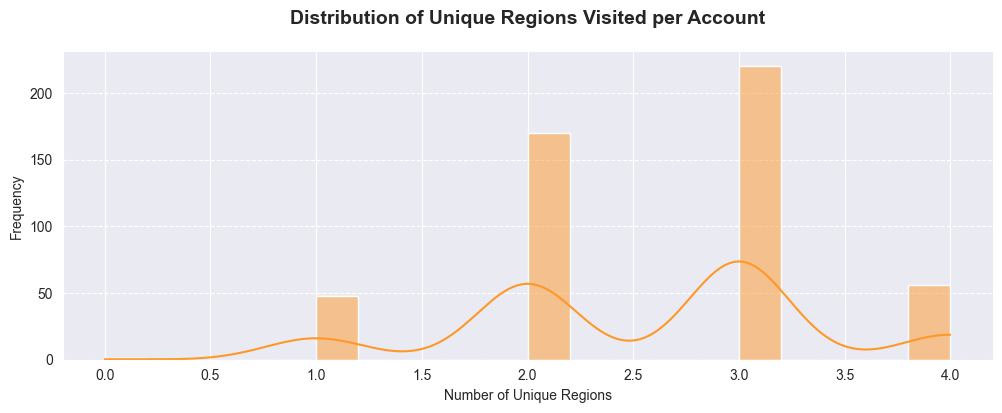

In [58]:
# Count unique Regions per AccountID
region_counts_per_account = df_bank_transactions.groupby("AccountID")["Region"].nunique().reset_index()
region_counts_per_account.columns = ["AccountID", "UniqueRegions"]

plt.figure(figsize=(12, 4))
sns.histplot(region_counts_per_account["UniqueRegions"], bins=20, kde=True, 
             color=sns.color_palette("YlOrBr", 1)[0])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of Unique Regions Visited per Account", fontsize=14, pad=20, weight="bold")
plt.xlabel("Number of Unique Regions")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--") 
plt.show()

**Insight**

* **Visual Observation**:

  * Most accounts access from **2–3 unique regions**, with the **3-region group** showing the highest frequency (over 200).
  * The **2-region group** is also common (around 170), suggesting many customers engage across multiple regions.
  * The **1-region** and **4-region** groups are less frequent, while the **0-region** group is nearly absent.

* **Implications**:

  1. The prevalence of **2–3 regions** indicates **diverse usage behavior**.
  2. The dominance of the **3-region group** may signal **widely active accounts**, which should be closely monitored to distinguish between **legitimate customer mobility** and **suspicious activity**.
  3. Accounts limited to **1 region** show more stable patterns, while the **4-region group**, though rare, may carry a **higher risk profile** due to unusual geographic spread.

### What are the AccountIDs of the accounts with the highest number of UniqueRegions?

In [59]:
# Identifying Accounts with Significant Location Shifts (duplicate logic removed)
print(f"\nIdentifying Accounts with Significant Location Shifts:")
significant_regions_shifts = region_counts_per_account[region_counts_per_account["UniqueRegions"] > 3]
display(significant_regions_shifts.head(10))


Identifying Accounts with Significant Location Shifts:


,AccountID,UniqueRegions
9,AC00010,4
20,AC00021,4
33,AC00035,4
53,AC00055,4
59,AC00061,4
71,AC00073,4
75,AC00077,4
77,AC00079,4
78,AC00080,4
81,AC00083,4


**Insight:**

This approach can help identify accounts exhibiting rapid or unusual location changes, which may indicate fraud, automated activity, or compromised accounts.

### What is the overall trend in daily transaction counts over the period covered by the data?

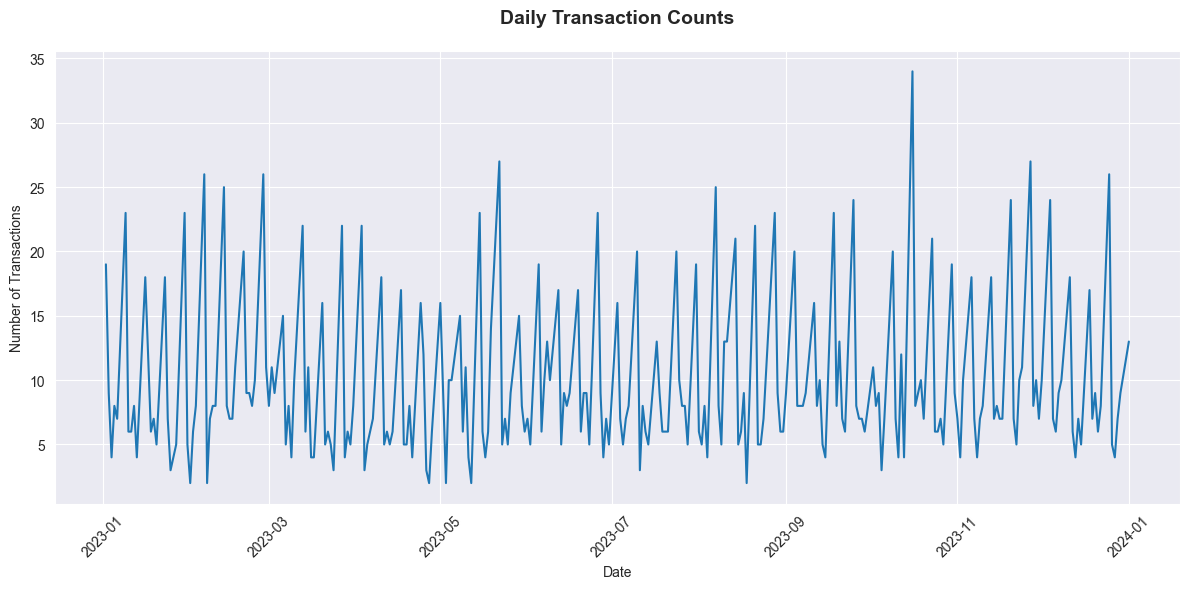

In [60]:
# Group by date and count transactions
daily_transactions = df_bank_transactions.groupby(df_bank_transactions["TransactionDate"].dt.date).size().reset_index(name="TransactionCount")
daily_transactions["TransactionDate"] = pd.to_datetime(daily_transactions["TransactionDate"])

plt.figure(figsize=(12, 6))  
sns.lineplot(x="TransactionDate", y="TransactionCount", data=daily_transactions)
plt.title("Daily Transaction Counts", fontsize=14, pad=20, weight="bold")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

**Insight**

* **Visual Observation**:

  * Daily transaction counts fluctuate significantly, generally ranging between **5–20 transactions per day**, with some peaks exceeding **25–30 transactions**.
  * There is no clear upward or downward trend throughout 2023; instead, the data displays a **repetitive fluctuation pattern**.
  * Several outliers are observed, with the highest days reaching over **30 transactions**, while the lowest days drop to only **2–3 transactions**.

* **Implications**:

  1. The high variability reflects **volatile daily transaction behavior**, potentially driven by factors such as payroll cycles, bill payments, or special events.
  2. The presence of multiple extreme peaks suggests the existence of **transaction surge days** or **unusual events requiring further investigation**.

### Is there a significant difference in transaction counts between weekdays and weekends?

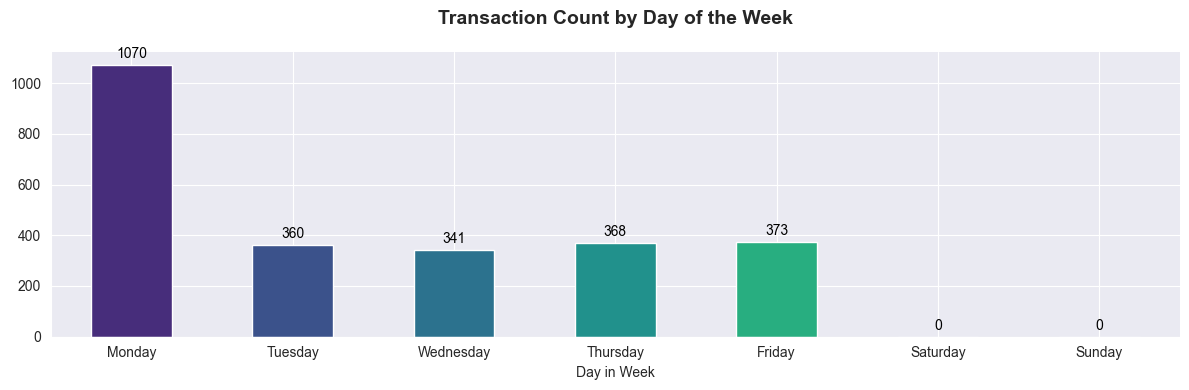

In [61]:
df_bank_transactions["TransactionDayInWeek"] = df_bank_transactions["TransactionDate"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_in_week_counts = df_bank_transactions["TransactionDayInWeek"].value_counts().reindex(day_order)

plt.figure(figsize=(12, 4))  
ax = day_in_week_counts.plot(kind="bar", color=sns.color_palette("viridis", 7))
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=10,
                     xytext=(0, 5),
                     textcoords="offset points")

plt.title("Transaction Count by Day of the Week", fontsize=14, pad=20, weight="bold")
plt.xlabel("Day in Week")
plt.xticks(rotation=0)
plt.ylabel("")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * **Monday** stands out with over **1,000 transactions**, far exceeding all other days of the week.
  * From **Tuesday to Friday**, transaction counts are more balanced, ranging between **350–380 transactions per day**.
  * **Saturday and Sunday** show almost no transactions, highlighting a sharp drop during weekends.

* **Implications**:

  1. The **Monday surge** indicates that transactions tend to accumulate at the start of the week, possibly due to **processing backlogs from the weekend** or **customer behavior in starting financial activity on Mondays**.
  2. The consistent activity from **Tuesday to Friday** reflects a **steady weekday transaction rhythm**.
  3. The near absence of weekend transactions suggests that the system or customers are **largely inactive on Saturdays and Sundays**, likely due to **bank operating hours** or **weekend rest habits**.

### How many transactions occurred during unusual hours (outside 9 AM - 6 PM)?

In [62]:
df_bank_transactions["TransactionHour"] = df_bank_transactions["TransactionDate"].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df_bank_transactions[df_bank_transactions["TransactionHour"].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region,TransactionDayInWeek,TransactionHour
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,West,Monday,18
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,Midwest,Thursday,18
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,Midwest,Thursday,18
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,West,Friday,18
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,South,Tuesday,18


### What is the distribution of transaction types (credit/debit) for transactions that occurred during unusual hours?

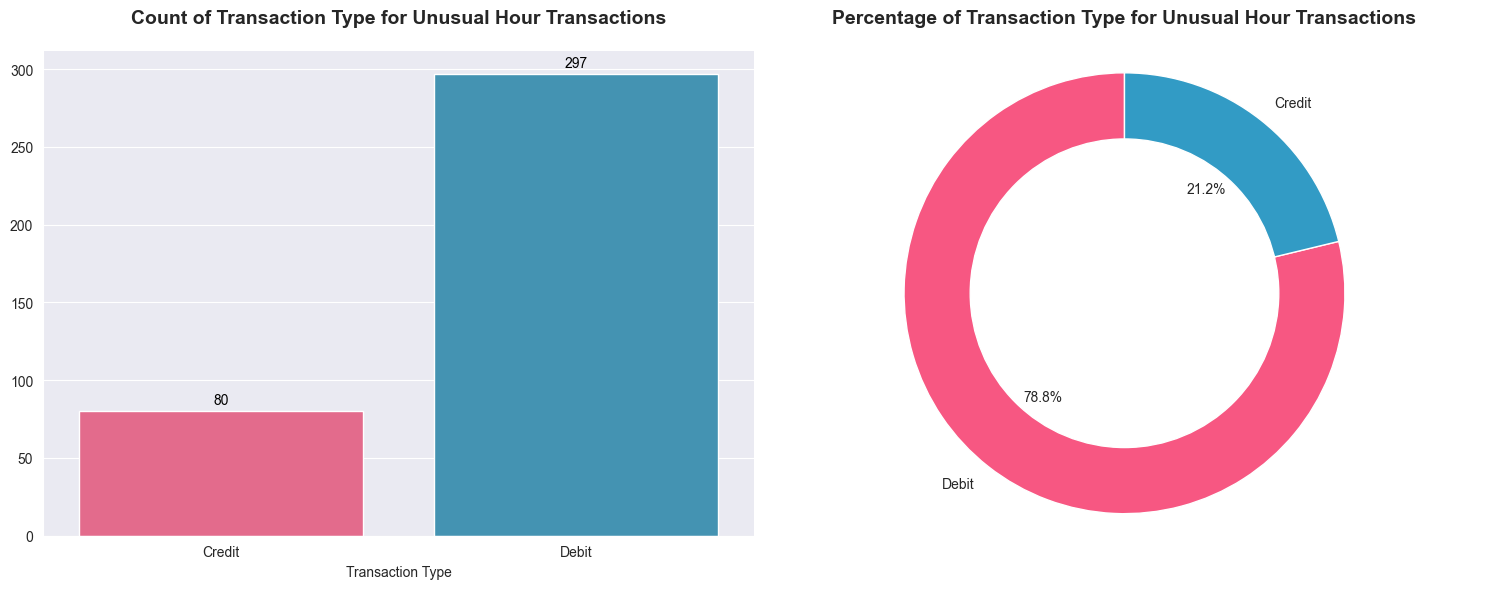

In [63]:
transaction_type_counts = unusual_hour_transactions["TransactionType"].value_counts()

# Function to display barplot and pie chart for categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.countplot(x="TransactionType", data=unusual_hour_transactions, ax=ax[0], 
              palette=color(n_colors=unusual_hour_transactions["TransactionType"].nunique()))
ax[0].set_title("Count of Transaction Type for Unusual Hour Transactions", 
                fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Transaction Type")
ax[0].set_ylabel("")

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="baseline",
                     color="black", fontsize=10,
                     xytext=(0, 5),
                     textcoords="offset points")
    
ax[0].set_axisbelow(True)
# ax[0].grid(axis="y", color="gray", linestyle="--", linewidth=0.7)
sns.despine(top=True, right=True, left=False, bottom=False)

wedges, texts, autotexts = ax[1].pie(
    transaction_type_counts,
    labels=transaction_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=color(n_colors=unusual_hour_transactions["TransactionType"].nunique())
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax[1].set_title("Percentage of Transaction Type for Unusual Hour Transactions", fontsize=14, pad=20, weight="bold")
ax[1].axis("equal")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * A total of **377 transactions** occurred outside normal business hours.
  * Among them, **Debit dominates with 297 transactions (78.8%)**, compared to only **80 Credit transactions (21.2%)**.
  * Debit volume is nearly **4 times higher than Credit**, showing a clear imbalance in unusual-hour activity by transaction type.

* **Implications**:

  1. The dominance of **Debit** suggests that spending/withdrawal activity during unusual hours may be linked to **urgent needs** or a **higher risk of fraud** compared to deposits.
  2. The much lower **Credit share** indicates that users rarely make deposits outside business hours, possibly due to behavioral patterns or system constraints.
  3. This pattern highlights **Debit transactions during unusual hours** as a critical group for monitoring, especially when involving high-value amounts.

### What is the range of unique account counts associated with these shared IP addresses?

In [64]:
# Multiple Accounts Using the Same IP Address
ip_counts = df_bank_transactions.groupby("IP Address")["AccountID"].nunique().reset_index()
ip_counts.columns = ["IP Address", "UniqueAccounts"]
shared_ips = ip_counts[ip_counts["UniqueAccounts"] > 1]
print(f"Number of IP addresses used by multiple accounts: {len(shared_ips)}")
display(shared_ips.head())

Number of IP addresses used by multiple accounts: 552


,IP Address,UniqueAccounts
0,1.198.76.182,8
1,1.238.163.61,3
2,1.7.29.72,2
3,1.98.25.114,3
4,10.144.131.89,3


### How many accounts are included in the high_ip_variability_accounts DataFrame?

Number of accounts with high IP variability: 366


,AccountID,UniqueIPAddresses
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
5,AC00006,4
6,AC00007,5
8,AC00009,5
9,AC00010,7
10,AC00011,7
11,AC00012,6


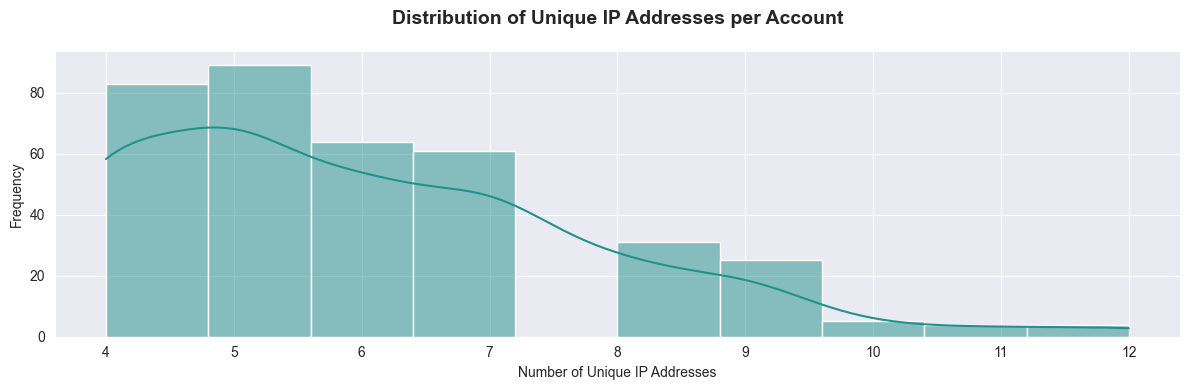

In [65]:
# Frequent IP Changes for a Single Account
# Group by AccountID to count unique IP Addresses
ip_variability = df_bank_transactions.groupby("AccountID")["IP Address"].nunique().reset_index().rename(columns={"IP Address": "UniqueIPAddresses"})
# Identify accounts with a high number of unique IP Addresses
high_ip_variability_accounts = ip_variability[ip_variability["UniqueIPAddresses"] > 3]  # Example threshold
print(f"Number of accounts with high IP variability: {len(high_ip_variability_accounts)}")
display(high_ip_variability_accounts.head(10))

# Plot distribution of unique IP addresses per account
plt.figure(figsize=(12, 4))
sns.histplot(high_ip_variability_accounts["UniqueIPAddresses"], bins=10, kde=True,
             color=sns.color_palette("viridis", 1)[0])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of Unique IP Addresses per Account", fontsize=14, pad=20, weight="bold")
plt.xlabel("Number of Unique IP Addresses")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### What is the overall shape of the transaction duration distribution?

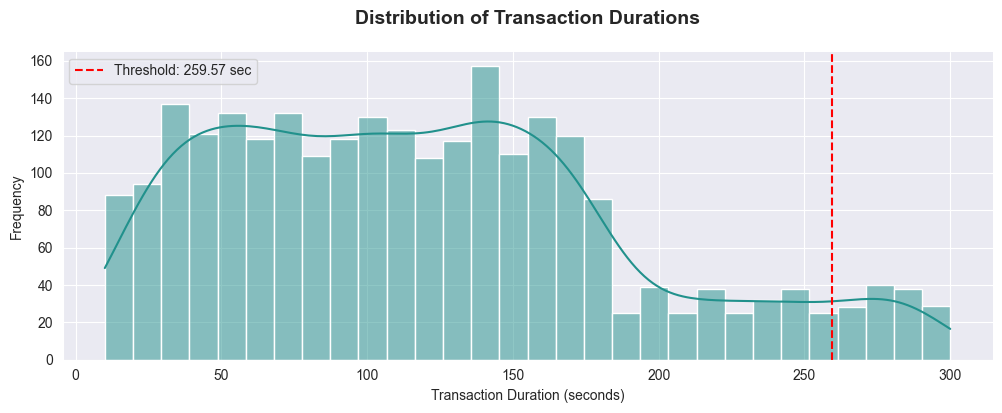

In [66]:
# Visualize distribution of TransactionDuration
long_duration_threshold = df_bank_transactions["TransactionDuration"].mean() + 2 * df_bank_transactions["TransactionDuration"].std()
plt.figure(figsize=(12, 4))
sns.histplot(df_bank_transactions["TransactionDuration"], bins=30, kde=True, 
             color=sns.color_palette("viridis", 1)[0])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axvline(long_duration_threshold, color="red", 
            linestyle="--", label=f"Threshold: {long_duration_threshold:.2f} sec") 
plt.title("Distribution of Transaction Durations", fontsize=14, pad=20, weight="bold")
plt.xlabel("Transaction Duration (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Insight**

* **Visual Observation**:

  * Transaction durations range widely from about **10 seconds up to nearly 300 seconds**.
  * Most transactions are concentrated between **30–170 seconds**, with the highest frequency bins reaching around **120–160 transactions** each.
  * The threshold is marked at **259.57 seconds**, and only a small portion of transactions exceed this limit.

* **Implications**:

  1. The majority of transactions complete within a reasonable timeframe (<170 seconds), indicating a **stable processing flow**.
  2. Transactions with unusually long durations (>259 seconds), though rare, may be linked to **technical issues, slow user actions, or potentially fraudulent activity** requiring monitoring.

### What is the distribution of transaction types (credit/debit) and Channels for transaction duration?

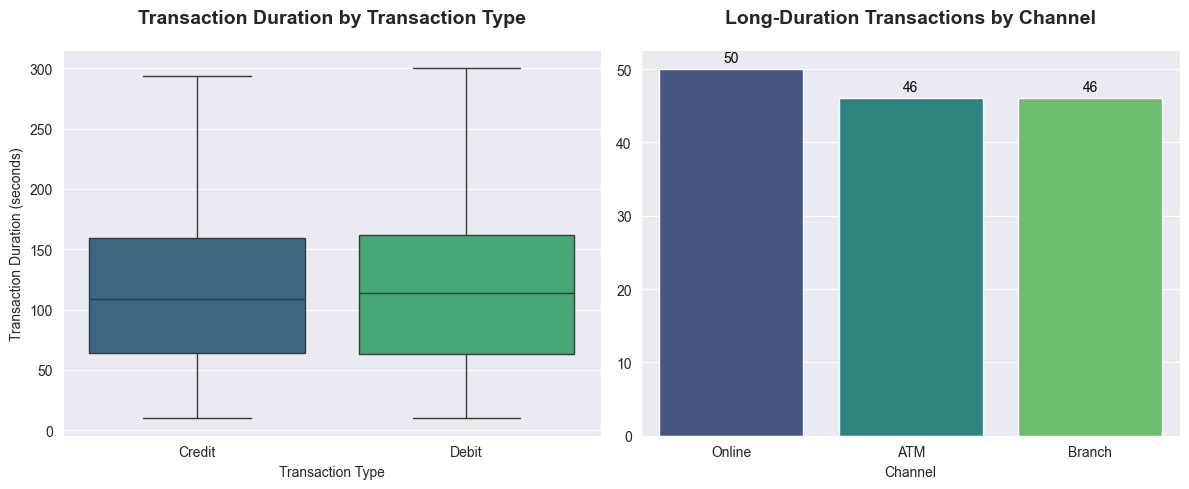

In [67]:
# Identify long-duration transactions
long_duration_transactions = df_bank_transactions[df_bank_transactions["TransactionDuration"] > long_duration_threshold]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  

# Boxplot of Transaction Duration by Transaction Type
sns.boxplot(ax=ax[0], x="TransactionType", y="TransactionDuration", data=df_bank_transactions, palette="viridis")
sns.despine(top=True, right=True, left=False, bottom=False, ax=ax[0])
ax[0].set_title("Transaction Duration by Transaction Type", fontsize=14, pad=20, weight="bold")
ax[0].set_xlabel("Transaction Type")
ax[0].set_ylabel("Transaction Duration (seconds)")

# Countplot of Long-Duration Transactions by Channel
channel_order = long_duration_transactions["Channel"].value_counts().index
sns.countplot(ax=ax[1], data=long_duration_transactions, x="Channel", order=channel_order, palette="viridis")
sns.despine(top=True, right=True, left=False, bottom=False, ax=ax[1])

for p in ax[1].patches:
    ax[1].annotate(f"{int(p.get_height())}",  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha="center", va="baseline",  
                color="black", fontsize=10,
                xytext=(0, 5), textcoords="offset points")

ax[1].set_title("Long-Duration Transactions by Channel", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Channel")
ax[1].set_ylabel("")
ax[1].tick_params(axis="x", rotation=0)

plt.tight_layout()  
plt.show()

**Insight**

* **Visual Observation**:

  * **Transaction Type**:

    * Both Debit and Credit show relatively similar duration distributions, with medians of about **115 seconds (Debit)** and **105 seconds (Credit)**.
    * Debit displays a slightly wider spread, with more transactions extending close to **300 seconds**.
    * Credit also reaches long durations (\~295 seconds), but less frequently than Debit.

  * **Channel**:

    * Long-duration transactions are almost evenly distributed: **Online (50)**, **Branch (46)**, and **ATM (46)**.
    * No single channel dominates, indicating that extended transaction times occur **across all channels**.

* **Implications**:

  1. Both Debit and Credit are prone to long-duration transactions, but **Debit tends to have more extreme outliers**, suggesting delays are more common when spending than when depositing.
  2. The even distribution across Online, Branch, and ATM indicates that long-duration transactions are a **system-wide issue**, not confined to a single channel.
  3. These extended durations may be caused by **technical issues, slow user actions, or potential risks (fraud, multi-step verification)**.

### What is the range of transaction durations within this top 5%? What are the minimum and maximum durations observed?

Number of transactions with long duration (top 5%): 123


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Region,TransactionDayInWeek,TransactionHour
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55,Midwest,Monday,17
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,D000671,81.248.235.147,M043,Online,65,Retired,276,1,3634.67,2024-11-04 08:09:44,South,Friday,17
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,D000297,33.28.138.82,M043,Branch,27,Student,283,1,1351.69,2024-11-04 08:08:30,Midwest,Wednesday,16
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,D000295,152.140.239.181,M046,Online,26,Student,280,1,6537.62,2024-11-04 08:08:45,South,Friday,16
113,TX000114,AC00121,213.76,2023-03-01 17:52:14,Credit,D000574,51.250.122.123,M009,ATM,78,Retired,282,1,3528.72,2024-11-04 08:09:36,South,Wednesday,17


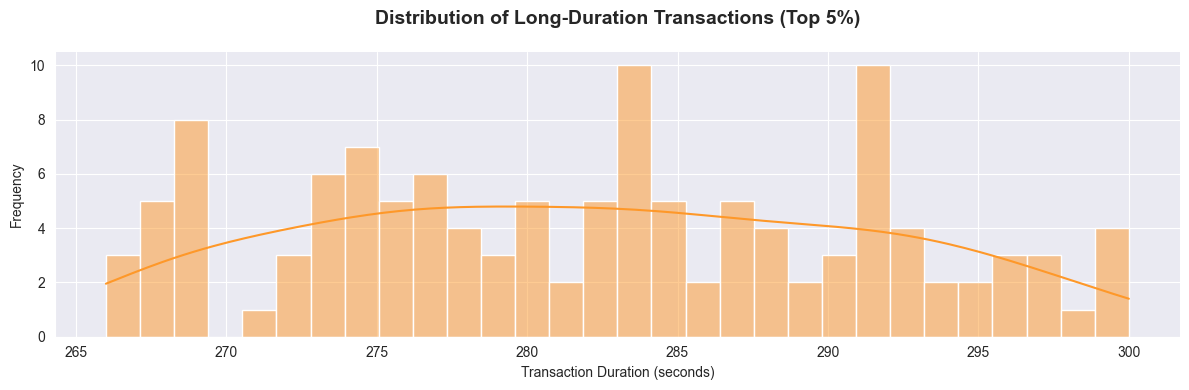

In [68]:
# Identify transactions with unusually long durations
long_duration_threshold = df_bank_transactions["TransactionDuration"].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df_bank_transactions[df_bank_transactions["TransactionDuration"] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

# Plot distribution of long-duration transactions
plt.figure(figsize=(12, 4))
sns.histplot(long_duration_transactions["TransactionDuration"], bins=30, kde=True, 
             color=sns.color_palette("YlOrBr", 1)[0])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of Long-Duration Transactions (Top 5%)", fontsize=14, pad=20, weight="bold")
plt.xlabel("Transaction Duration (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight**

* **Visual Observation**:

  * The chart focuses on the **top 5% of transactions with the longest durations**, ranging from **265–300 seconds**.
  * The distribution is relatively even without a single dominant peak, though clusters appear around **270s, 275s, 285s, and 291s**.
  * A few transactions reach the maximum of **300 seconds**, suggesting either a **system limit** or transactions that stalled for an extended period.

* **Implications**:

  1. These transactions fall into the outlier group (top 5%), representing **rare cases** but with potential impact on customer experience or system stability.
  2. The clusters around specific duration points (270s, 275s, 285s) may indicate **technical thresholds or fixed processing steps** in the system.
  3. Transactions hitting the extreme limit (300s) are of particular concern, as they may relate to **timeouts, system errors, or fraudulent activities being flagged/held**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Anomaly Detection</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Anomaly Detection
    </h1>
</div>


In [69]:
df_bank_transactions.drop(columns=["PreviousTransactionDate", "TransactionDate"],
                          axis=1, inplace=True)

df_bank_transactions["Hour_sin"] = np.sin(2 * np.pi * df_bank_transactions["TransactionHour"]/24)
df_bank_transactions["Hour_cos"] = np.cos(2 * np.pi * df_bank_transactions["TransactionHour"]/24)

num_features = ["TransactionAmount", "CustomerAge", "TransactionDuration",
                "AccountBalance", "Hour_sin", "Hour_cos"]
new_cat_features = ["TransactionType", "Channel", "Region", "CustomerOccupation", "TransactionDayInWeek", "LoginAttempts"]

def convert_cat(features, df = df_bank_transactions):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(new_cat_features)

df_bank_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TransactionID         2512 non-null   category
 1   AccountID             2512 non-null   category
 2   TransactionAmount     2512 non-null   float64 
 3   TransactionType       2512 non-null   category
 4   DeviceID              2512 non-null   category
 5   IP Address            2512 non-null   category
 6   MerchantID            2512 non-null   category
 7   Channel               2512 non-null   category
 8   CustomerAge           2512 non-null   int64   
 9   CustomerOccupation    2512 non-null   category
 10  TransactionDuration   2512 non-null   int64   
 11  LoginAttempts         2512 non-null   category
 12  AccountBalance        2512 non-null   float64 
 13  Region                2453 non-null   category
 14  TransactionDayInWeek  2512 non-null   category
 15  Tran

## Re-check and Handling Skew

In [70]:
skew_feature, skew_df = check_skewness(data=df_bank_transactions, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
TransactionAmount              |  +1.740107 | Highly skewed
Hour_cos                       |  +0.764228 | Moderately skewed
AccountBalance                 |  +0.601201 | Moderately skewed
TransactionDuration            |  +0.599432 | Moderately skewed
Hour_sin                       |  -0.214948 | Approximately symmetric
CustomerAge                    |  +0.147864 | Approximately symmetric
----------------------------------------------------------------------


In [71]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))
    print(to_transform)

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [72]:
processed_df, transformed_columns, sparse_columns, skewed_columns, pt_dict = handle_skewed_features(df=df_bank_transactions, num_features=skew_feature)
num_features = ["PT_TransactionAmount", "CustomerAge", "PT_TransactionDuration", "PT_AccountBalance", "Hour_sin", "Hour_cos"]
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=num_features)

['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'Hour_cos']

🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Hour_cos                       |  +0.764228 | Moderately skewed
Hour_sin                       |  -0.214948 | Approximately symmetric
PT_AccountBalance              |  -0.162008 | Approximately symmetric
CustomerAge                    |  +0.147864 | Approximately symmetric
PT_TransactionDuration         |  -0.078108 | Approximately symmetric
PT_TransactionAmount           |  -0.051555 | Approximately symmetric
----------------------------------------------------------------------


## Re-check Outliers

In [73]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier
✅ No outliers detected in the selected features.


## K-Means

In [74]:
X = processed_df[num_features + new_cat_features].copy()

# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_standard_scaler_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(transformers=[
    ("num_standard", num_standard_scaler_transformer, num_features),
    ("cat_onehot", cat_onehot_transformer, new_cat_features)
])

preprocessor.fit(X)

ColumnTransformer(transformers=[('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['PT_TransactionAmount', 'CustomerAge',
                                  'PT_TransactionDuration', 'PT_AccountBalance',
                                  'Hour_sin', 'Hour_cos']),
                                ('cat_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['TransactionType', 'Channel', 'Region',
                                  'CustomerOccupation', 'TransactionDayInWeek',
                                  'LoginAttempts'])])

In [75]:
X_prepared = preprocessor.transform(X)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_standard__PT_TransactionAmount',
 'num_standard__CustomerAge',
 'num_standard__PT_TransactionDuration',
 'num_standard__PT_AccountBalance',
 'num_standard__Hour_sin',
 'num_standard__Hour_cos',
 'cat_onehot__TransactionType_Credit',
 'cat_onehot__TransactionType_Debit',
 'cat_onehot__Channel_ATM',
 'cat_onehot__Channel_Branch',
 'cat_onehot__Channel_Online',
 'cat_onehot__Region_Midwest',
 'cat_onehot__Region_Northeast',
 'cat_onehot__Region_South',
 'cat_onehot__Region_West',
 'cat_onehot__CustomerOccupation_Doctor',
 'cat_onehot__CustomerOccupation_Engineer',
 'cat_onehot__CustomerOccupation_Retired',
 'cat_onehot__CustomerOccupation_Student',
 'cat_onehot__TransactionDayInWeek_Friday',
 'cat_onehot__TransactionDayInWeek_Monday',
 'cat_onehot__TransactionDayInWeek_Thursday',
 'cat_onehot__TransactionDayInWeek_Tuesday',
 'cat_onehot__TransactionDayInWeek_Wednesday',
 'cat_onehot__LoginAttempts_1',
 'cat_onehot__LoginAttempts_2',
 'cat_onehot__LoginAttempts_3',
 'cat_onehot__Logi

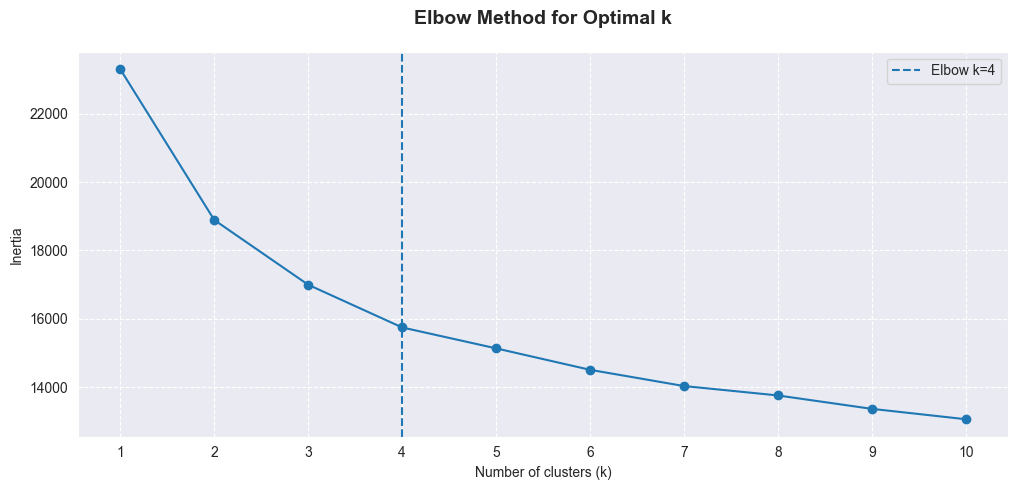

Optimal k suggested by Elbow: 4


In [76]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# If X_prepared is sparse, convert to dense
X_use = X_prepared.toarray() if hasattr(X_prepared, "toarray") else X_prepared

# --- Elbow Method ---
inertia = []
K_elbow = range(1, 11)  # k = 1..10
for k in K_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_use)
    inertia.append(kmeans.inertia_)

# Find the elbow point
kneedle = KneeLocator(list(K_elbow), inertia, curve="convex", direction="decreasing")
k_best_elbow = kneedle.knee

# Plot Elbow
plt.figure(figsize=(12, 5))
plt.plot(list(K_elbow), inertia, marker="o", linestyle="-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k", fontsize=14, pad=20, weight="bold")
plt.grid(True, linestyle="--")
plt.xticks(range(1, 11))

# Mark elbow if found
if k_best_elbow is not None:
    plt.axvline(k_best_elbow, linestyle="--", label=f"Elbow k={k_best_elbow}")
    plt.legend()

plt.show()

print(f"Optimal k suggested by Elbow: {k_best_elbow}")

In [77]:
# Fit K-means with the chosen number of clusters (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_use)

# Assign clusters and calculate distance to cluster centroid
processed_df["Cluster"] = kmeans.labels_
processed_df["DistanceToCentroid"] = np.linalg.norm(X_use - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = processed_df["DistanceToCentroid"].quantile(0.95)
potential_frauds = processed_df[processed_df["DistanceToCentroid"] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,LoginAttempts,Region,TransactionDayInWeek,TransactionHour,Hour_sin,Hour_cos,PT_TransactionAmount,PT_TransactionDuration,PT_AccountBalance,Cluster,DistanceToCentroid
4,TX000005,AC00411,Credit,D000308,65.164.3.100,M091,Online,26,Student,1,South,Monday,17,-0.965926,-0.258819,-1.760804,1.096135,0.732513,1,3.289841
6,TX000007,AC00199,Credit,D000241,140.212.253.222,M019,ATM,37,Doctor,1,West,Wednesday,16,-0.866025,-0.500000,-2.017226,0.420379,1.614585,0,3.218670
25,TX000026,AC00041,Credit,D000671,81.248.235.147,M043,Online,65,Retired,1,South,Friday,17,-0.965926,-0.258819,-1.996790,1.839601,-0.110768,3,3.503713
41,TX000042,AC00480,Debit,D000627,109.105.179.186,M046,Online,38,Doctor,1,Northeast,Monday,16,-0.866025,-0.500000,-1.292735,-1.855242,1.726033,0,3.212540
85,TX000086,AC00098,Credit,D000574,165.114.224.47,M012,Online,54,Engineer,1,South,Friday,17,-0.965926,-0.258819,2.176235,-1.504219,0.944472,3,3.394451


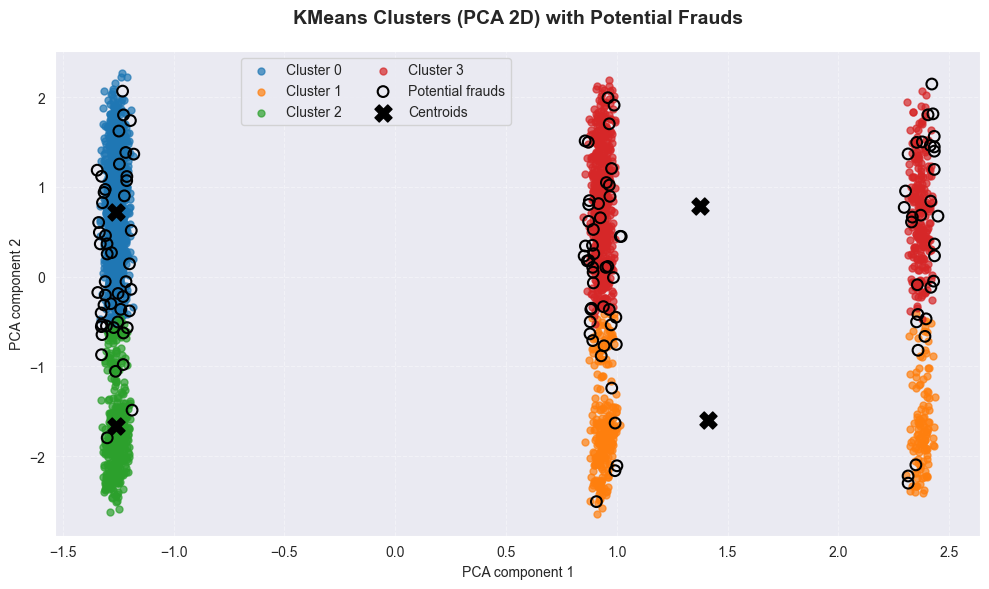

In [78]:
from sklearn.decomposition import PCA

# Compute distances to centroids and identify potential frauds
distances = np.linalg.norm(X_use - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = np.quantile(distances, 0.95)  # 95th percentile
is_fraud = distances > threshold

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_use)

# Project centroids into PCA space
centroids2 = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(10, 6))

# Plot each cluster
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for c in range(4):  # since k = 4
    mask = (kmeans.labels_ == c) & (~is_fraud)
    plt.scatter(
        X2[mask, 0], X2[mask, 1],
        s=25, alpha=0.7, color=colors[c], label=f"Cluster {c}"
    )

# Plot potential frauds
plt.scatter(
    X2[is_fraud, 0], X2[is_fraud, 1],
    s=60, facecolors="none", edgecolors="black",
    linewidths=1.5, label="Potential frauds"
)

# Plot centroids
plt.scatter(
    centroids2[:, 0], centroids2[:, 1],
    s=150, marker="X", c="black", label="Centroids"
)

plt.title("KMeans Clusters (PCA 2D) with Potential Frauds", fontsize=14, weight="bold", pad=20)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(ncol=2, frameon=True, bbox_to_anchor=(0.5, 1))
plt.tight_layout()
plt.show()


**Chart Analysis**

1. Clusters

* **Cluster 0 (blue)** and **Cluster 2 (green):**

  * Located on the **left side (PCA component 1 < 0)**.
  * Both clusters are well separated, with their centroids positioned in the middle.

* **Cluster 1 (orange)** and **Cluster 3 (red):**

  * Located on the **right side (PCA component 1 > 0)**.
  * These two clusters are closer to each other but still distinguishable thanks to PCA.
  * Their centroids are also centered within the dense regions of each cluster.

2. Centroids (purple X)

* Each cluster has a centroid positioned right at the center of the cluster.
* This indicates that KMeans has grouped the data in a fairly balanced way.

3. Potential Frauds (black-edged, hollow circles)

* These points represent the **top 5% farthest distances** from their respective centroids.
* Observations:

  * They are mostly located on the **edges of clusters**.
  * They appear in **all four clusters**, which means unusual transactions are spread across multiple behavioral patterns, not just concentrated in one cluster.
  * Some points are quite isolated from the dense regions → more likely to be fraudulent transactions.

**Insights**

* The plot clearly illustrates the **main clusters in the dataset** as well as the **outliers**.
* Using black edges for potential frauds makes them easy to distinguish from **Cluster 3** (red), which previously had a color overlap.
* This method is suitable for **detecting anomalous transactions** in high-dimensional datasets, with PCA used for effective 2D visualization.

## DBSCAN

In [79]:
features_num = ["PT_TransactionAmount", "PT_TransactionDuration", "PT_AccountBalance"]
features_cat = ["Channel", "LoginAttempts", "CustomerOccupation", "TransactionType"]

# Select relevant features for DBSCAN 
X = processed_df[features_num + features_cat].copy()

In [80]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_standard_scaler_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(transformers=[
    ("num_standard", num_standard_scaler_transformer, features_num),
    ("cat_onehot", cat_onehot_transformer, features_cat)
])

preprocessor.fit(X)

ColumnTransformer(transformers=[('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['PT_TransactionAmount',
                                  'PT_TransactionDuration',
                                  'PT_AccountBalance']),
                                ('cat_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Channel', 'LoginAttempts',
                                  'CustomerOccupation', 'TransactionType'])])

In [81]:
X_prepared = preprocessor.transform(X)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_standard__PT_TransactionAmount',
 'num_standard__PT_TransactionDuration',
 'num_standard__PT_AccountBalance',
 'cat_onehot__Channel_ATM',
 'cat_onehot__Channel_Branch',
 'cat_onehot__Channel_Online',
 'cat_onehot__LoginAttempts_1',
 'cat_onehot__LoginAttempts_2',
 'cat_onehot__LoginAttempts_3',
 'cat_onehot__LoginAttempts_4',
 'cat_onehot__LoginAttempts_5',
 'cat_onehot__CustomerOccupation_Doctor',
 'cat_onehot__CustomerOccupation_Engineer',
 'cat_onehot__CustomerOccupation_Retired',
 'cat_onehot__CustomerOccupation_Student',
 'cat_onehot__TransactionType_Credit',
 'cat_onehot__TransactionType_Debit']

In [82]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_prepared)

processed_df["DBSCAN_Cluster"] = dbscan.labels_

# Map the cluster labels to descriptive names
label_mapping = {
    -1: "Fraud (Outliers)",  
    0: "Normal",
    1: "Suspicious Group 1",
    2: "Suspicious Group 2",
    3: "Suspicious Group 3",
    4: "Suspicious Group 4",
}

# Map cluster labels to descriptive names
processed_df["Cluster_Description"] = processed_df["DBSCAN_Cluster"].map(label_mapping)

# Identify outliers (noise points) labeled as -1
potential_frauds = processed_df[processed_df["DBSCAN_Cluster"] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected by DBSCAN: 25


,TransactionID,AccountID,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,LoginAttempts,Region,TransactionDayInWeek,TransactionHour,Hour_sin,Hour_cos,PT_TransactionAmount,PT_TransactionDuration,PT_AccountBalance,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
117,TX000118,AC00498,Credit,D000256,101.90.40.193,M086,ATM,43,Engineer,2,South,Monday,16,-0.866025,-0.500000,-0.976967,0.197896,0.390223,0,2.560259,-1,Fraud (Outliers)
167,TX000168,AC00332,Credit,D000606,110.150.1.201,M010,Online,53,Retired,2,Midwest,Tuesday,17,-0.965926,-0.258819,0.930495,0.699303,-0.976459,3,3.188906,-1,Fraud (Outliers)
188,TX000189,AC00132,Credit,D000503,10.191.172.154,M083,ATM,60,Engineer,1,Northeast,Monday,17,-0.965926,-0.258819,-1.849037,1.559680,-1.013001,3,3.577355,-1,Fraud (Outliers)
274,TX000275,AC00454,Credit,D000476,50.202.8.53,M074,ATM,54,Engineer,5,Midwest,Wednesday,16,-0.866025,-0.500000,1.991455,0.836405,-1.725958,2,3.789727,-1,Fraud (Outliers)
476,TX000477,AC00442,Credit,D000663,34.86.220.205,M079,ATM,55,Engineer,2,NaN,Monday,16,-0.866025,-0.500000,-1.014149,-1.315438,-0.445374,0,2.969879,-1,Fraud (Outliers)


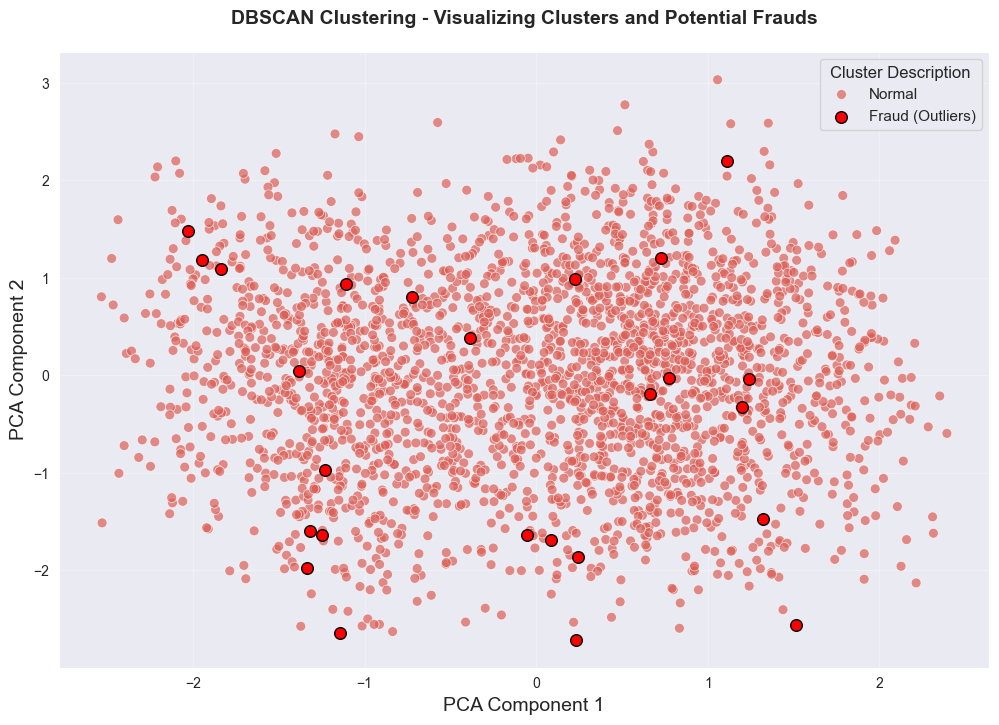

In [83]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prepared)

# Add PCA results to the DataFrame
processed_df["PCA1"] = X_pca[:, 0]
processed_df["PCA2"] = X_pca[:, 1]

# Exclude outliers (-1) when creating the color palette for seaborn
clusters_no_outliers = processed_df[processed_df["DBSCAN_Cluster"] != -1]
unique_labels = clusters_no_outliers["Cluster_Description"].unique()
palette = sns.color_palette("hls", len(unique_labels))

# Scatter plot for normal points & suspicious clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clusters_no_outliers, x="PCA1", y="PCA2", hue="Cluster_Description", palette=palette, alpha=0.7, s=50)

# Highlight outliers with red dots and black edges, add a proper legend entry
outliers = processed_df[processed_df["DBSCAN_Cluster"] == -1]
plt.scatter(outliers["PCA1"], outliers["PCA2"], c="red", edgecolor="black", s=70, label="Fraud (Outliers)")

# Customize the plot
plt.title("DBSCAN Clustering - Visualizing Clusters and Potential Frauds", fontsize=14, weight="bold", pad=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title="Cluster Description", fontsize=11, title_fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Chart Analysis**

**Cluster Formation**

The plot shows that most transactions are grouped into a **large, dense cluster** labeled as *Normal*. This indicates that DBSCAN has successfully identified the majority of typical transaction behaviors that share similar patterns.

**Potential Frauds (Outliers)**

The **red points with black edges** represent transactions flagged as *Fraud (Outliers)* by DBSCAN.

* These points are scattered across the PCA space.
* Their dispersion suggests that they do not belong to the main transaction cluster and deviate significantly from the normal transaction density.
* This makes them strong candidates for fraudulent activity.

**Suspicious Groups**

In this specific run, DBSCAN has mainly separated the dataset into:

* One **large “Normal” cluster**.
* A set of **outliers (Fraud)** rather than forming multiple suspicious sub-clusters.
  This result implies that most abnormal activities are best represented as individual anomalies (outliers) instead of forming dense suspicious groups.

**Feature Scaling and Encoding**

Before applying DBSCAN, the dataset underwent **standardization** and **encoding** to ensure fair contribution of all features to the clustering process.

* **StandardScaler** was applied to numerical features so that each feature has a mean of 0 and a standard deviation of 1.

  * This prevents features with large numerical ranges (e.g., transaction amount) from dominating the distance calculations.
* **One-hot encoding** was used for categorical features such as transaction type.

  * This avoids introducing an artificial ordinal relationship between categories and allows DBSCAN to interpret transaction types correctly.

**Outlier Detection**

DBSCAN’s strength lies in **density-based anomaly detection**:

* Points in low-density regions are labeled as outliers (`-1`).
* These represent rare or unusual transactions that do not conform to typical transaction patterns.

**Number of Potential Frauds**

The DBSCAN run has identified **25 transactions** as potential frauds.

**Overall Analysis**

The DBSCAN clustering analysis has:

* Effectively grouped **normal transactions** into a single cluster.
* Flagged a number of **outlier transactions** that deviate significantly from expected transaction patterns.
* Provided a **clear visual separation** between normal and potentially fraudulent activities.

## Isolation Forest

In [84]:
from sklearn.ensemble import IsolationForest

# Define outlier mapping
outlier_mapping = {1: "Normal", -1: "Potential Fraud"}

# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_use)

# Predict anomalies
processed_df["AnomalyScore"] = iso_forest.decision_function(X_use)
processed_df["IsAnomaly"] = iso_forest.predict(X_use)  

# Map results to descriptive labels
processed_df["AnomalyLabel"] = processed_df["IsAnomaly"].map(outlier_mapping)

# Filter out detected anomalies
potential_frauds = processed_df[processed_df["IsAnomaly"] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionType,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,LoginAttempts,Region,TransactionDayInWeek,TransactionHour,Hour_sin,Hour_cos,PT_TransactionAmount,PT_TransactionDuration,PT_AccountBalance,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description,PCA1,PCA2,AnomalyScore,IsAnomaly,AnomalyLabel
19,TX000020,AC00285,Credit,D000039,120.170.93.69,M039,Online,18,Student,1,Midwest,Thursday,18,-1.000000,-1.836970e-16,-0.824184,0.779916,0.570294,1,3.066652,0,Normal,0.448665,0.347409,-0.006909,-1,Potential Fraud
23,TX000024,AC00453,Debit,D000162,191.82.103.198,M083,Online,22,Student,3,South,Tuesday,18,-1.000000,-1.836970e-16,0.518726,0.458097,-0.928527,1,2.431750,0,Normal,-1.251955,0.492235,-0.031875,-1,Potential Fraud
32,TX000033,AC00060,Debit,D000621,133.67.250.163,M007,ATM,49,Engineer,3,Northeast,Monday,16,-0.866025,-5.000000e-01,0.661841,0.768511,1.109692,0,2.536713,0,Normal,0.855423,1.157862,-0.005892,-1,Potential Fraud
38,TX000039,AC00478,Debit,D000077,49.29.37.185,M048,ATM,66,Doctor,2,West,Thursday,17,-0.965926,-2.588190e-01,1.471423,-0.271384,0.818927,3,2.828185,0,Normal,0.549665,0.625522,-0.012091,-1,Potential Fraud
61,TX000062,AC00002,Debit,D000285,7.146.35.122,M087,Branch,79,Retired,2,South,Tuesday,16,-0.866025,-5.000000e-01,0.249598,1.388331,0.035167,0,3.023422,0,Normal,-0.023024,1.306365,-0.021279,-1,Potential Fraud


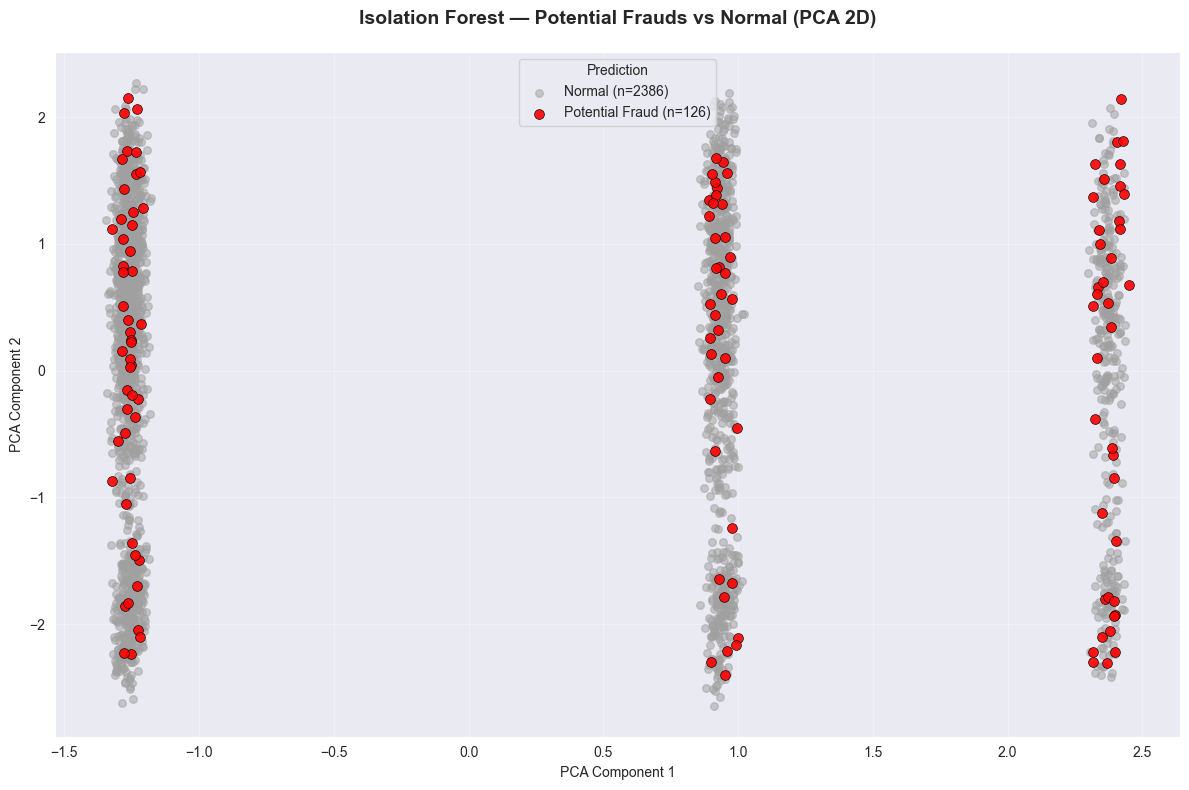

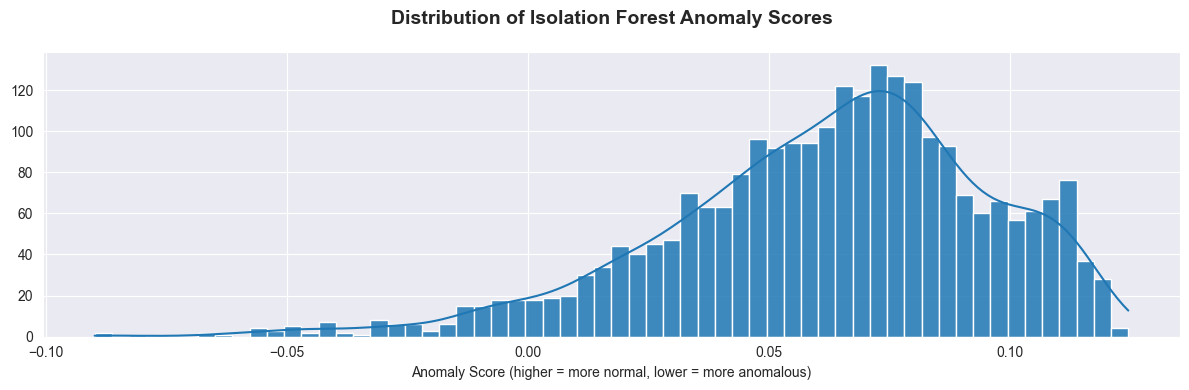

In [85]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_use)

# Combine into DataFrame for visualization
viz_df = processed_df.copy()
viz_df["PCA1_Isolation"] = X_pca[:, 0]
viz_df["PCA2_Isolation"] = X_pca[:, 1]

# Split groups: normal vs anomaly
normal_df = viz_df[viz_df["IsAnomaly"] == 1]
anomaly_df = viz_df[viz_df["IsAnomaly"] == -1]

# Scatter plot: plot normal first, then fraud (to highlight anomalies on top)
plt.figure(figsize=(12, 8))
plt.scatter(
    normal_df["PCA1_Isolation"], normal_df["PCA2_Isolation"],
    s=30, alpha=0.5, label=f'Normal (n={len(normal_df)})',
    c="#A0A0A0"  # gray
)
plt.scatter(
    anomaly_df["PCA1_Isolation"], anomaly_df["PCA2_Isolation"],
    s=50, alpha=0.9, label=f'Potential Fraud (n={len(anomaly_df)})',
    c="red", edgecolors="black", linewidths=0.5
)

plt.title("Isolation Forest — Potential Frauds vs Normal (PCA 2D)", fontsize=14, weight="bold", pad=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Prediction")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Histogram of Anomaly Scores for threshold reference =====
plt.figure(figsize=(12, 4))
sns.histplot(viz_df["AnomalyScore"], bins=60, kde=True, edgecolor="white", alpha=0.85)
plt.title("Distribution of Isolation Forest Anomaly Scores", fontsize=14, weight="bold", pad=20)
plt.xlabel("Anomaly Score (higher = more normal, lower = more anomalous)")
plt.ylabel("")
plt.tight_layout()
plt.show()


**Chart Analysis**

**Isolation Forest Analysis — Overview**

**1. Cluster Visualization (PCA 2D Projection)**

* The first plot projects transaction data into a **PCA 2D space**, separated according to Isolation Forest predictions.
* **Gray points** represent *normal transactions* (n=2386).
* **Red points** represent *potential fraudulent transactions* (n=126).
* Anomalies are scattered across multiple PCA clusters rather than concentrated in a single region, which is consistent with the nature of fraud — *rare, irregular, and dispersed across different transaction patterns*.
* The small proportion of anomalies compared to normal transactions reflects the typical characteristic of fraud detection tasks, where fraud cases are scarce.

**2. Distribution of Anomaly Scores**

* The second plot shows the **distribution of anomaly scores** generated by Isolation Forest.
* **Higher scores** (right side, around 0.04 to 0.10) correspond to **normal transactions**, forming the dense peak of the distribution.
* **Lower scores** (left tail, <0.0) correspond to **suspicious transactions**.
* The extended left tail highlights the existence of a small subset of transactions that deviate significantly from normal behavior.

**3. Fraud Detection Insight**

* Isolation Forest flagged **126 transactions (≈5%)** as *potential frauds*, based on the chosen contamination parameter.
* These flagged transactions clearly stand out in the anomaly score distribution, falling into the low-score region.
* The visualization confirms that the model effectively isolates rare and suspicious behaviors from the majority of normal transactions.

**4. Overall Conclusion**

* Isolation Forest has:

  * Identified the majority of transactions as *normal*, with a stable anomaly score distribution.
  * Flagged a small set of transactions as *potential frauds*, concentrated in the left tail of the distribution.
* The clear separation between normal and anomalous transactions indicates that Isolation Forest is a suitable method for fraud detection, particularly when fraud cases are **rare and dispersed**.

<!-- Google Fonts for Roboto -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #762a83;
    padding: 20px;
    background: linear-gradient(135deg, #e7d4e8, #d9f0d3);
    font-family: 'Roboto', sans-serif;
    box-shadow: 0 4px 8px rgba(0,0,0,0.2);
">
  <h4 style="color:#40004b; font-weight:700; margin-bottom:15px;"> Acknowledgements</h4>
  <p style="font-size:15px; color:#333;"> 
  <a href="https://www.kaggle.com/sulaniishara" style="color:#762a83; text-decoration:underline;">
    @sulaniishara -
  </a>  
  <a href="https://www.kaggle.com/code/sulaniishara/fraud-detection-clustering-anomaly-analysis" style="color:#762a83; text-decoration:underline;">
    🚨 Fraud Detection: Clustering & Anomaly Analysis
  </a>
</p>

  <h4 style="color:#40004b; font-weight:700; margin-top:30px; margin-bottom:16px;">References</h4>
  <ul style="color:#333; font-size:15px;">
    <li><a href="https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection" style="color:#762a83;">Bank Transaction Dataset for Fraud Detection</a></li>
  </ul>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
